In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from xgboost import XGBClassifier
from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import math as mt
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, matthews_corrcoef,cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')
#import lightgbm as lgb
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.rod import ROD
from pyod.models.inne import INNE

from pyod.models.xgbod import XGBOD
from pyod.models.loda import LODA
from pyod.models.suod import SUOD

from pyod.models.so_gaal import SO_GAAL
from pyod.models.mo_gaal import MO_GAAL
from pyod.models.deep_svdd import DeepSVDD

from pyod.models.alad import ALAD
from pyod.models.rgraph import RGraph
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from pyod.models.ecod import ECOD
from pyod.models.copod import COPOD
from pyod.models.anogan import AnoGAN

import lightgbm as lgbb

2023-06-28 13:10:27.624900: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-28 13:10:28.464642: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 13:10:30.392505: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 13:10:30.393678: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 13:10:35.029875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
#Australian Credit data
df=pd.read_csv("/home/purobi/Desktop/cc_approvals.csv",names=["a", "b", "c", "d","e", "f", "g", "h","i", "j", "k", "l","m", "n", "o", "p"])
df.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       690 non-null    object 
 1   b       690 non-null    object 
 2   c       690 non-null    float64
 3   d       690 non-null    object 
 4   e       690 non-null    object 
 5   f       690 non-null    object 
 6   g       690 non-null    object 
 7   h       690 non-null    float64
 8   i       690 non-null    object 
 9   j       690 non-null    object 
 10  k       690 non-null    int64  
 11  l       690 non-null    object 
 12  m       690 non-null    object 
 13  n       690 non-null    object 
 14  o       690 non-null    int64  
 15  p       690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(690, 16)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
c,690.0,4.758725,4.978163,0.0,1.000,2.75,7.2075,28.0
h,690.0,2.223406,3.346513,0.0,0.165,1.00,2.6250,28.5
k,690.0,2.400000,4.862940,0.0,0.000,0.00,3.0000,67.0
o,690.0,1017.385507,5210.102598,0.0,0.000,5.00,395.5000,100000.0


In [7]:
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
j    0
k    0
l    0
m    0
n    0
o    0
p    0
dtype: int64

In [8]:
categorical_features = df.select_dtypes(include=[np.object]).columns
df[categorical_features]

,a,b,d,e,f,g,i,j,l,m,n,p
0,b,30.83,u,g,w,v,t,t,f,g,202,+
1,a,58.67,u,g,q,h,t,t,f,g,43,+
2,a,24.5,u,g,q,h,t,f,f,g,280,+
3,b,27.83,u,g,w,v,t,t,t,g,100,+
4,b,20.17,u,g,w,v,t,f,f,s,120,+
...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,y,p,e,h,f,f,f,g,260,-
686,a,22.67,u,g,c,v,f,t,t,g,200,-
687,a,25.25,y,p,ff,ff,f,t,t,g,200,-
688,b,17.92,u,g,aa,v,f,f,f,g,280,-


In [9]:
df['a'].value_counts()

b    468
a    210
?     12
Name: a, dtype: int64

In [10]:
df['b'].value_counts()

?        12
22.67     9
20.42     7
18.83     6
24.5      6
         ..
48.25     1
28.33     1
18.75     1
18.5      1
36.42     1
Name: b, Length: 350, dtype: int64

In [11]:
df['n'].value_counts()

0      132
200     35
120     35
160     34
100     30
      ... 
21       1
393      1
395      1
93       1
256      1
Name: n, Length: 171, dtype: int64

In [12]:
df.drop(df.index[df['a'] == '?'], inplace = True)

In [13]:
df.drop(df.index[df['b'] == '?'], inplace=True)

In [14]:
df.drop(df.index[df['n'] == '?'], inplace=True)

In [15]:
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
j    0
k    0
l    0
m    0
n    0
o    0
p    0
dtype: int64

In [16]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [17]:
df = df.reset_index(drop=True)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,654.0,0.689602,0.463010,0.0,0.000,1.000,1.0000,1.0
b,654.0,144.221713,91.457191,0.0,69.000,129.500,215.0000,340.0
c,654.0,4.830558,5.023295,0.0,1.040,2.855,7.4375,28.0
d,654.0,1.229358,0.427959,0.0,1.000,1.000,1.0000,2.0
e,654.0,0.467890,0.845514,0.0,0.000,0.000,0.0000,2.0
f,654.0,6.762997,4.301121,0.0,2.000,7.000,11.0000,14.0
g,654.0,6.074924,2.503697,0.0,4.000,8.000,8.0000,9.0
h,654.0,2.241690,3.369197,0.0,0.165,1.000,2.6150,28.5
i,654.0,0.535168,0.499143,0.0,0.000,1.000,1.0000,1.0
j,654.0,0.438838,0.496625,0.0,0.000,0.000,1.0000,1.0


In [19]:
X = df.drop('p', axis=1)
y = df[['p']].copy()
scaler = MinMaxScaler(feature_range=(0,1))
rX = scaler.fit_transform(X)

In [20]:
X.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o'],
      dtype='object')

In [21]:
Xn=pd.DataFrame(rX,columns=["a", "b", "c", "d","e", "f", "g", "h","i", "j", "k", "l","m", "n", "o"])

In [22]:
Xn["p"]=y
Xn

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
650,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
651,0.0,0.282353,0.482143,1.0,1.0,0.428571,0.333333,0.070175,0.0,1.0,0.014925,1.0,0.0,0.239264,0.00001,1
652,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [23]:
#1 KNN
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

knn=KNN(contamination=outliers_fraction) 
knn.fit(Xn,y)
# predict raw anomaly score
scores_pred = knn.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = knn.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : KNN")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
yknn=pd.DataFrame(y_pred,columns=['out'])
df1=Xn.loc[yknn[yknn['out'] == 0].index]
df1 = df1.reset_index(drop=True)
df1

Outlier Detecter : KNN
Number of Outliers : 55 Number of Inliers : 599
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1.0,0.691176,0.117500,0.5,0.0,0.714286,0.888889,0.122807,0.0,0.0,0.000000,1.0,1.0,0.656442,0.00000,1
595,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
596,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
597,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [24]:
#2 ABOD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

abod=ABOD(contamination=outliers_fraction)
abod.fit(Xn,y)
# predict raw anomaly score
scores_pred = abod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = abod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : ABOD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
yabod=pd.DataFrame(y_pred,columns=['out'])
yabod
df2=Xn.loc[yabod[yabod['out'] == 0].index]
df2 = df2.reset_index(drop=True)
df2

Outlier Detecter : ABOD
Number of Outliers : 68 Number of Inliers : 586
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1.0,0.600000,0.026786,1.0,1.0,0.285714,0.888889,0.020526,0.0,0.0,0.000000,0.0,0.0,0.368098,0.00003,1
582,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
583,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
584,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [25]:
#3 ECOD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

ecod=ECOD(contamination=outliers_fraction)
ecod.fit(Xn,y)
# predict raw anomaly score
scores_pred = ecod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = ecod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : ECOD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
yecod=pd.DataFrame(y_pred,columns=['out'])
df3=Xn.loc[yecod[yecod['out'] == 0].index]
df3 = df3.reset_index(drop=True)
df3

Outlier Detecter : ECOD
Number of Outliers : 66 Number of Inliers : 588
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
584,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
585,0.0,0.282353,0.482143,1.0,1.0,0.428571,0.333333,0.070175,0.0,1.0,0.014925,1.0,0.0,0.239264,0.00001,1
586,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [26]:
#4 COPOD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

copod=COPOD(contamination=outliers_fraction)
copod.fit(Xn,y)
# predict raw anomaly score
scores_pred = copod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = copod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : COPOD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
ycopod=pd.DataFrame(y_pred,columns=['out'])
df4=Xn.loc[ycopod[ycopod['out'] == 0].index]
df4 = df4.reset_index(drop=True)
df4

Outlier Detecter : COPOD
Number of Outliers : 66 Number of Inliers : 588
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
2,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
3,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
4,1.0,0.485294,0.142857,0.5,0.0,0.714286,0.888889,0.087719,1.0,0.0,0.000000,1.0,0.0,0.570552,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
584,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
585,0.0,0.282353,0.482143,1.0,1.0,0.428571,0.333333,0.070175,0.0,1.0,0.014925,1.0,0.0,0.239264,0.00001,1
586,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [28]:
#5 CBLOF
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

cblof=CBLOF(contamination=outliers_fraction)
cblof.fit(Xn,y)
# predict raw anomaly score
scores_pred = cblof.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = cblof.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : CBLOF")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
ycblof=pd.DataFrame(y_pred,columns=['out'])
df5=Xn.loc[ycblof[ycblof['out'] == 0].index]
df5 = df5.reset_index(drop=True)
df5

Outlier Detecter : CBLOF
Number of Outliers : 66 Number of Inliers : 588
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.485294,0.142857,0.5,0.0,0.714286,0.888889,0.087719,1.0,0.0,0.000000,1.0,0.0,0.570552,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.0,0.691176,0.117500,0.5,0.0,0.714286,0.888889,0.122807,0.0,0.0,0.000000,1.0,1.0,0.656442,0.00000,1
584,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
585,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
586,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [29]:
#6 Feature Bagging
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

featurebagging=FeatureBagging(contamination=outliers_fraction)
featurebagging.fit(Xn,y)
# predict raw anomaly score
scores_pred = featurebagging.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = featurebagging.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : FEATUREBAGGING")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
yfeaturebagging=pd.DataFrame(y_pred,columns=['out'])
yfeaturebagging
df6=Xn.loc[yfeaturebagging[yfeaturebagging['out'] == 0].index]
df6 = df6.reset_index(drop=True)
df6

Outlier Detecter : FEATUREBAGGING
Number of Outliers : 56 Number of Inliers : 598
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.485294,0.142857,0.5,0.0,0.714286,0.888889,0.087719,1.0,0.0,0.000000,1.0,0.0,0.570552,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
594,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
595,0.0,0.282353,0.482143,1.0,1.0,0.428571,0.333333,0.070175,0.0,1.0,0.014925,1.0,0.0,0.239264,0.00001,1
596,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [39]:
#7 Isolation Forest
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

iforest=IForest(contamination=outliers_fraction)
iforest.fit(Xn,y)
# predict raw anomaly score
scores_pred = iforest.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = iforest.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : IFOREST")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yiforest=pd.DataFrame(y_pred,columns=['out'])

df7=Xn.loc[yiforest[yiforest['out'] == 0].index]

df7= df7.reset_index(drop=True)
df7

Outlier Detecter : IFOREST
Number of Outliers : 66 Number of Inliers : 588
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.0,0.691176,0.117500,0.5,0.0,0.714286,0.888889,0.122807,0.0,0.0,0.000000,1.0,1.0,0.656442,0.00000,1
584,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
585,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
586,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [30]:
#8 LOF
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

lof=LOF(contamination=outliers_fraction)
lof.fit(Xn,y)
# predict raw anomaly score
scores_pred = lof.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = lof.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : LOF")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

ylof=pd.DataFrame(y_pred,columns=['out'])

df8=Xn.loc[ylof[ylof['out'] == 0].index]

df8 = df8.reset_index(drop=True)
df8

Outlier Detecter : LOF
Number of Outliers : 60 Number of Inliers : 594
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
590,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
591,0.0,0.282353,0.482143,1.0,1.0,0.428571,0.333333,0.070175,0.0,1.0,0.014925,1.0,0.0,0.239264,0.00001,1
592,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [31]:
#9 ROD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

rod=ROD(contamination=outliers_fraction)
rod.fit(Xn,y)
# predict raw anomaly score
scores_pred = rod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = rod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : ROD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yrod=pd.DataFrame(y_pred,columns=['out'])

df9=Xn.loc[yrod[yrod['out'] == 0].index]

df9 = df9.reset_index(drop=True)
df9

Outlier Detecter : ROD
Number of Outliers : 66 Number of Inliers : 588
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
584,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
585,0.0,0.282353,0.482143,1.0,1.0,0.428571,0.333333,0.070175,0.0,1.0,0.014925,1.0,0.0,0.239264,0.00001,1
586,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [32]:
#10 INNE
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

inne=INNE(contamination=outliers_fraction)
inne.fit(Xn,y)
# predict raw anomaly score
scores_pred = inne.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = inne.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : INNE")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yinne=pd.DataFrame(y_pred,columns=['out'])

df10=Xn.loc[yinne[yinne['out'] == 0].index]

df10 = df10.reset_index(drop=True)
df10

Outlier Detecter : INNE
Number of Outliers : 66 Number of Inliers : 588
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.485294,0.142857,0.5,0.0,0.714286,0.888889,0.087719,1.0,0.0,0.000000,1.0,0.0,0.570552,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.0,0.691176,0.117500,0.5,0.0,0.714286,0.888889,0.122807,0.0,0.0,0.000000,1.0,1.0,0.656442,0.00000,1
584,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
585,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
586,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [33]:
#11 XGBOD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

xgbod=XGBOD(contamination=outliers_fraction)
xgbod.fit(Xn,y)
# predict raw anomaly score
scores_pred = xgbod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = xgbod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : XGBOD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yxgbod=pd.DataFrame(y_pred,columns=['out'])

df11=Xn.loc[yxgbod[yxgbod['out'] == 0].index]

df11 = df11.reset_index(drop=True)
df11

[13:11:28] WARNING: ../src/learner.cc:627: 
Parameters: { "contamination", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Outlier Detecter : XGBOD
Number of Outliers : 358 Number of Inliers : 296
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.0,0.164706,0.214286,0.5,0.0,0.071429,0.888889,0.087719,1.0,1.0,0.044776,0.0,0.0,0.944785,0.00918,0
292,1.0,0.135294,0.086250,0.5,0.0,0.142857,0.888889,0.070175,1.0,1.0,0.164179,1.0,0.0,0.239264,0.03000,0
293,0.0,0.405882,0.016429,0.5,0.0,0.642857,0.888889,0.018947,1.0,1.0,0.059701,0.0,0.0,0.607362,0.00500,0
294,1.0,0.020588,0.001429,0.5,0.0,0.142857,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0


In [34]:
#12 LODA
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

loda=LODA(contamination=outliers_fraction)
loda.fit(Xn,y)
# predict raw anomaly score
scores_pred = loda.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = loda.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : LODA")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yloda=pd.DataFrame(y_pred,columns=['out'])

df12=Xn.loc[yloda[yloda['out'] == 0].index]

df12 = df12.reset_index(drop=True)
df12

Outlier Detecter : LODA
Number of Outliers : 66 Number of Inliers : 588
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
584,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
585,0.0,0.282353,0.482143,1.0,1.0,0.428571,0.333333,0.070175,0.0,1.0,0.014925,1.0,0.0,0.239264,0.00001,1
586,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [35]:
#13 SUOD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

suod=SUOD(contamination=outliers_fraction)
suod.fit(Xn,y)
# predict raw anomaly score
scores_pred = suod.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = suod.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : SUOD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

ysuod=pd.DataFrame(y_pred,columns=['out'])


df13=Xn.loc[ysuod[ysuod['out'] == 0].index]

df13 = df13.reset_index(drop=True)
df13

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Outlier Detecter : SUOD
Number of Outliers : 63 Number of Inliers : 591
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,1.0,0.691176,0.117500,0.5,0.0,0.714286,0.888889,0.122807,0.0,0.0,0.000000,1.0,1.0,0.656442,0.00000,1
587,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
588,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
589,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [36]:
#14 DeepSVDD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

deepsvdd=DeepSVDD(contamination=outliers_fraction)
deepsvdd.fit(Xn,y)
# predict raw anomaly score
scores_pred = deepsvdd.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = deepsvdd.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : DeepSVDD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

ydeepsvdd=pd.DataFrame(y_pred,columns=['out'])


df14=Xn.loc[ydeepsvdd[ydeepsvdd['out'] == 0].index]


df14 = df14.reset_index(drop=True)
df14

21/21 [==============================] - 0s 1ms/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_1 (Dense)             (None, 64)                1024      
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 32)               0         
 bda)                                                            
                                                                 
 tf.math.pow_1 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_1 (TFOpL  (None,)                  0         
 ambda

Epoch 64/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2033 - val_loss: 0.1961
Epoch 65/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2019 - val_loss: 0.1958
Epoch 66/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2008 - val_loss: 0.1951
Epoch 67/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2001 - val_loss: 0.1945
Epoch 68/100
19/19 [==============================] - 0s 5ms/step - loss: 0.1995 - val_loss: 0.1937
Epoch 69/100
19/19 [==============================] - 0s 5ms/step - loss: 0.1985 - val_loss: 0.1933
Epoch 70/100
19/19 [==============================] - 0s 6ms/step - loss: 0.1977 - val_loss: 0.1927
Epoch 71/100
19/19 [==============================] - 0s 5ms/step - loss: 0.1969 - val_loss: 0.1922
Epoch 72/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1962 - val_loss: 0.1918
Epoch 73/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1956 - val_loss: 0.1913


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
584,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
585,0.0,0.282353,0.482143,1.0,1.0,0.428571,0.333333,0.070175,0.0,1.0,0.014925,1.0,0.0,0.239264,0.00001,1
586,1.0,0.058824,0.007321,0.5,0.0,0.071429,0.888889,0.001404,0.0,0.0,0.000000,0.0,0.0,0.435583,0.00750,1


In [37]:
#15 ALAD
random_state = np.random.RandomState(42)
outliers_fraction = 0.1

alad=ALAD(contamination=outliers_fraction)
alad.fit(Xn,y)
# predict raw anomaly score
scores_pred = alad.decision_function(Xn) * -1

# prediction of a datapoint category outlier or inlier
y_pred = alad.predict(Xn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("Outlier Detecter : ALAD")
print("Number of Outliers :",n_outliers,"Number of Inliers :",n_inliers)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

yalad=pd.DataFrame(y_pred,columns=['out'])


df15=Xn.loc[yalad[yalad['out'] == 0].index]


df15= df15.reset_index(drop=True)
df15

Outlier Detecter : ALAD
Number of Outliers : 66 Number of Inliers : 588
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p
0,1.0,0.450000,0.000000,0.5,0.0,0.928571,0.888889,0.043860,1.0,1.0,0.014925,0.0,0.0,0.251534,0.00000,0
1,0.0,0.944118,0.159286,0.5,0.0,0.785714,0.444444,0.106667,1.0,1.0,0.089552,0.0,0.0,0.693252,0.00560,0
2,0.0,0.258824,0.017857,0.5,0.0,0.785714,0.444444,0.052632,1.0,0.0,0.000000,0.0,0.0,0.435583,0.00824,0
3,1.0,0.361765,0.055000,0.5,0.0,0.928571,0.888889,0.131579,1.0,1.0,0.074627,1.0,0.0,0.006135,0.00003,0
4,1.0,0.123529,0.200893,0.5,0.0,0.928571,0.888889,0.060000,1.0,0.0,0.000000,0.0,1.0,0.042945,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.0,0.691176,0.117500,0.5,0.0,0.714286,0.888889,0.122807,0.0,0.0,0.000000,1.0,1.0,0.656442,0.00000,1
584,1.0,0.150000,0.360179,1.0,1.0,0.357143,0.444444,0.043860,0.0,0.0,0.000000,0.0,0.0,0.398773,0.00000,1
585,0.0,0.205882,0.026786,0.5,0.0,0.142857,0.888889,0.070175,0.0,1.0,0.029851,1.0,0.0,0.239264,0.00394,1
586,0.0,0.282353,0.482143,1.0,1.0,0.428571,0.333333,0.070175,0.0,1.0,0.014925,1.0,0.0,0.239264,0.00001,1


In [40]:
X1 = df1.drop('p', axis=1)
y1 = df1[['p']].copy()
X2 = df2.drop('p', axis=1)
y2 = df2[['p']].copy()
X3 = df3.drop('p', axis=1)
y3 = df3[['p']].copy()
X4 = df4.drop('p', axis=1)
y4 = df4[['p']].copy()
X5 = df5.drop('p', axis=1)
y5 = df5[['p']].copy()
X6 = df6.drop('p', axis=1)
y6 = df6[['p']].copy()
X7 = df7.drop('p', axis=1)
y7 = df7[['p']].copy()
X8 = df8.drop('p', axis=1)
y8 = df8[['p']].copy()
X9 = df9.drop('p', axis=1)
y9 = df9[['p']].copy()
X10 = df10.drop('p', axis=1)
y10 = df10[['p']].copy()
X11 = df11.drop('p',axis=1)
y11 = df11[['p']]
X12 = df12.drop('p', axis=1)
y12 = df12[['p']].copy()
X13 = df13.drop('p', axis=1)
y13 = df13[['p']].copy()
X14 = df14.drop('p', axis=1)
y14 = df14[['p']].copy()
X15 = df15.drop('p', axis=1)
y15 = df15[['p']].copy()

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=42)
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=42)
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.2, random_state=42)
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.2, random_state=42)
X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y11, test_size=0.2, random_state=42)
X_train12, X_test12, y_train12, y_test12 = train_test_split(X12, y12, test_size=0.2, random_state=42)
X_train13, X_test13, y_train13, y_test13 = train_test_split(X13, y13, test_size=0.2, random_state=42)
X_train14, X_test14, y_train14, y_test14 = train_test_split(X14, y14, test_size=0.2, random_state=42)
X_train15, X_test15, y_train15, y_test15 = train_test_split(X15, y15, test_size=0.2, random_state=42)

In [42]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("\n----Model--",model)
    print("\n---------------------TRAINING RESULTS----------------------- \n")

    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))

    cm = confusion_matrix(y_train, y_train_pred)
     
    print("--------------------------------------------------------------------------\n")
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[0][0]
    specificity = tn/(tn+fp)

    print(f" CONFUSION MATRIX:\n{cm}")
    print(f" ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f" CLASSIFICATION REPORT:\n{clf_report}")
    print(f"\n MCC = {matthews_corrcoef(y_train, y_train_pred)}")
    print("\n specificity = ",specificity)
    print("\n Cohen Kappa = ",cohen_kappa_score(y_train, y_train_pred))
    print("\n F1 Score = ",f1_score(y_train, y_train_pred))
    #print("\n Log Loss = ",log_loss(y_train, y_train_pred))
    Pre=tp / (tp + fp)
    print("\n Precision = ",Pre)
    Rec=tp / (tp + fn)
    print("\n Recall = ",Rec)
    #print("\n GMean = ",mt.sqrt(Pre*Rec))
    #print("\nBrier Loss = ",(y_train_pred-y_train)*(y_train_pred-y_train))
    cv = RepeatedStratifiedKFold(n_splits=10, random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print("\n 10 fold cv = ",np.mean(scores))
    cv1 = RepeatedStratifiedKFold(n_splits=5, random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv=cv1, scoring='accuracy')
    print("\n 5 fold cv = ",np.mean(scores))


    print("-----------------------TESTING RESULTS-------------------------- \n")

    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    cm  = confusion_matrix(y_test, y_test_pred)
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[0][0]
    specificity = tn/(tn+fp)
    print(f" CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f" ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f" CLASSIFICATION REPORT:\n{clf_report}")
    print(f"\n MCC: = {matthews_corrcoef(y_test, y_test_pred)}")
    print("\n specificity = ",specificity)
    print("\n Cohen Kappa = ",cohen_kappa_score(y_test, y_test_pred))
    print("\n F1 Score = ",f1_score(y_test, y_test_pred))
    #print("\n Log Loss = ",log_loss(y_test, y_test_pred))
    Pre=tp / (tp + fp)
    print("\n Precision = ",Pre)
    Rec=tp / (tp + fn)
    print("\n Recall = ",Rec)
    #print("\n GMean = ",mt.sqrt(Pre*Rec))
    #print("\nBrier Loss = ",(y_test_pred-y_test)*(y_test_pred-y_test))
    cv = RepeatedStratifiedKFold(n_splits=10, random_state=1)
    scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='accuracy')
    print("\n 10 fold cv = ",np.mean(scores))
    cv1 = RepeatedStratifiedKFold(n_splits=5, random_state=1)
    scores = cross_val_score(model, X_test, y_test, cv=cv1, scoring='accuracy')
    print("\n 5 fold cv = ",np.mean(scores))
    y_proba1 = model.predict_proba(X_test)[:,1]
    print("\n RoC AUC Score:: ",roc_auc_score(y_test, y_proba1,average='macro'))
    fpr, tpr, thresholds = roc_curve(y_test, y_proba1)
    plt.plot(fpr, tpr)

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

-----------------1st--KNN---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[218   0]
 [  0 261]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    218.0  261.0       1.0      479.0         479.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8440425531914894

 5 fold cv =  0.8501184210526316
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[45  5]
 [ 9 61]]
 ACCURACY SCORE:
0.8833
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8275

 RoC AUC Score::  0.8857142857142858


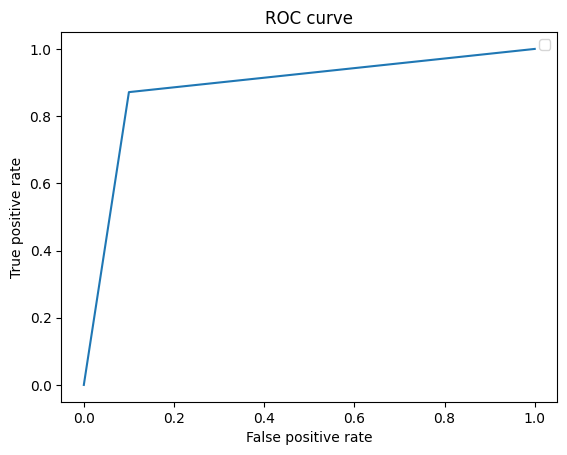

-----------------2nd--ABOD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[219   0]
 [  0 249]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    219.0  249.0       1.0      468.0         468.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8629463459759482

 5 fold cv =  0.8651567147105926
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[40  8]
 [ 8 62]]
 ACCURACY SCORE:
0.8644
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted av

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8031521739130434

 RoC AUC Score::  0.8595238095238095


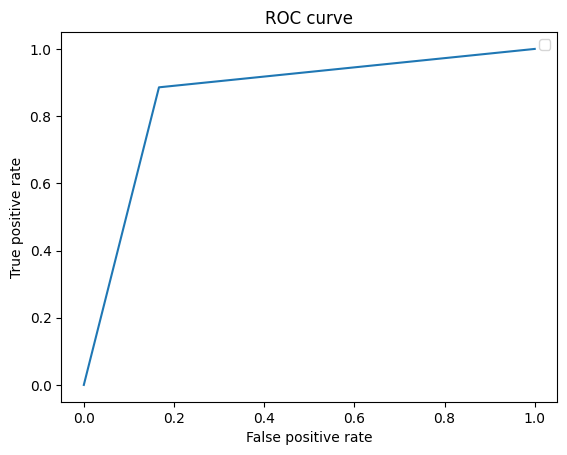

-----------------3rd--ECOD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[199   0]
 [  0 271]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    199.0  271.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7987234042553193

 5 fold cv =  0.7982978723404256
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[38  7]
 [13 60]]
 ACCURACY SCORE:
0.8305
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted av

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8040217391304348

 RoC AUC Score::  0.8331811263318112


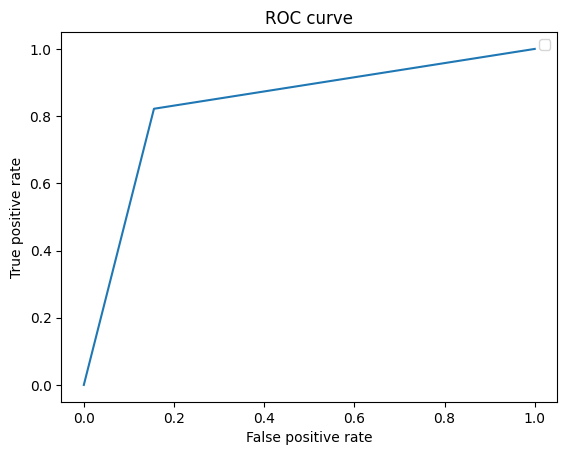

-----------------4th--COPOD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[198   0]
 [  0 272]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    198.0  272.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8214893617021276

 5 fold cv =  0.82468085106383
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[32 10]
 [13 63]]
 ACCURACY SCORE:
0.8051
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7775000000000002

 RoC AUC Score::  0.7954260651629073


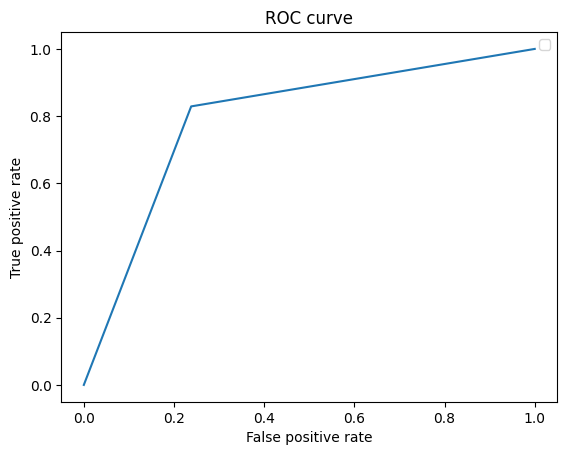

-----------------5th--CBLOF---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[224   0]
 [  0 246]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    224.0  246.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8770212765957447

 5 fold cv =  0.8655319148936171
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[45  5]
 [13 55]]
 ACCURACY SCORE:
0.8475
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7777898550724639

 RoC AUC Score::  0.8544117647058823


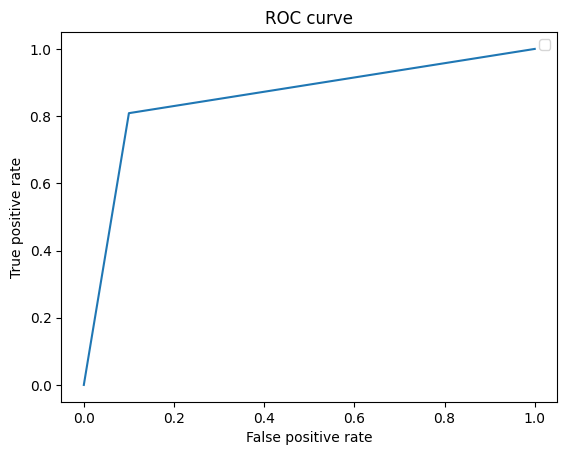

-----------------6th--FB---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[220   0]
 [  0 258]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    220.0  258.0       1.0      478.0         478.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8579875886524824

 5 fold cv =  0.8552346491228071
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[46  2]
 [11 61]]
 ACCURACY SCORE:
0.8917
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.8766666666666667

 5 fold cv =  0.8708333333333335

 RoC AUC Score::  0.9027777777777778


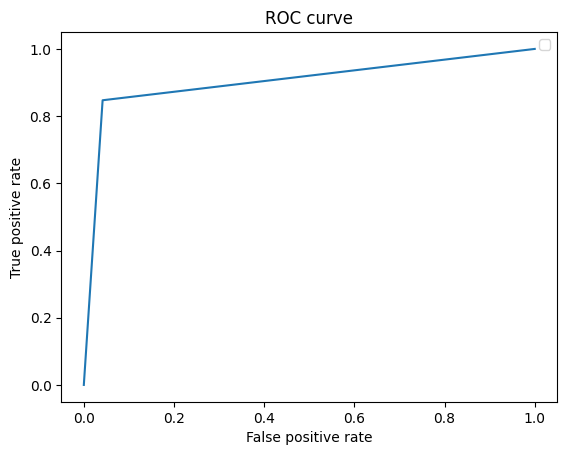

-----------------7th--IFOREST---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[215   0]
 [  0 255]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    215.0  255.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8268085106382981

 5 fold cv =  0.8342553191489362
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[42  4]
 [16 56]]
 ACCURACY SCORE:
0.8305
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.8087878787878786

 5 fold cv =  0.8154347826086956

 RoC AUC Score::  0.8454106280193238


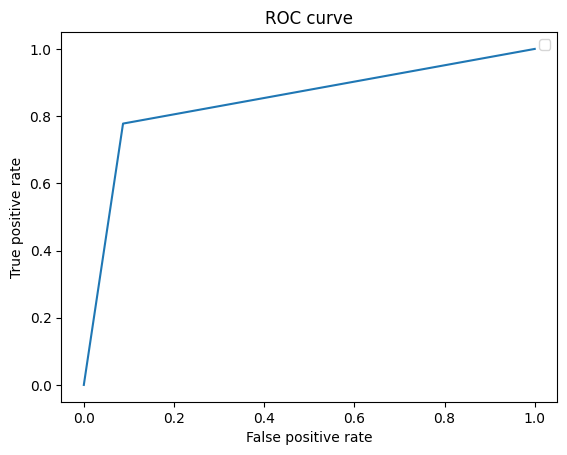

-----------------8th--LOF---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[226   0]
 [  0 249]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    226.0  249.0       1.0      475.0         475.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8702526595744682

 5 fold cv =  0.8696842105263158
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[45  7]
 [10 57]]
 ACCURACY SCORE:
0.8571
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.8061363636363634

 5 fold cv =  0.8077536231884058

 RoC AUC Score::  0.8580654420206659


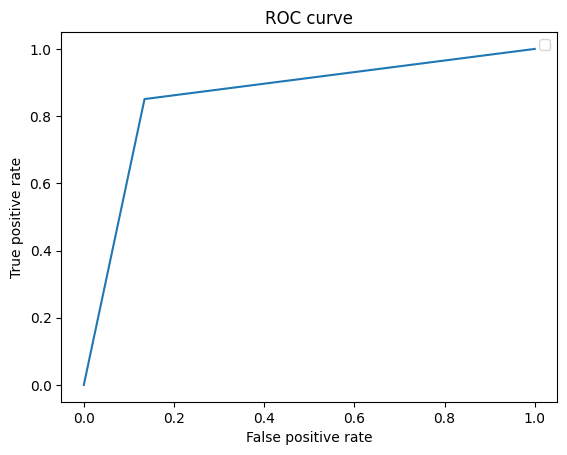

-----------------9th--ROD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[193   0]
 [  0 277]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    193.0  277.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.7951063829787235

 5 fold cv =  0.7936170212765958
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[35  6]
 [13 64]]
 ACCURACY SCORE:
0.8390
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.7784848484848484

 5 fold cv =  0.7921739130434783

 RoC AUC Score::  0.8424136838770986


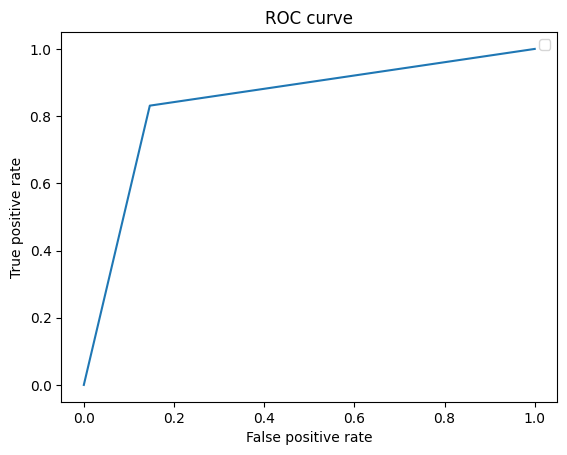

-----------------10th--INNE---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[216   0]
 [  0 254]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    216.0  254.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8853191489361703

 5 fold cv =  0.8814893617021278
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[40  8]
 [15 55]]
 ACCURACY SCORE:
0.8051
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7753985507246378

 RoC AUC Score::  0.8095238095238095


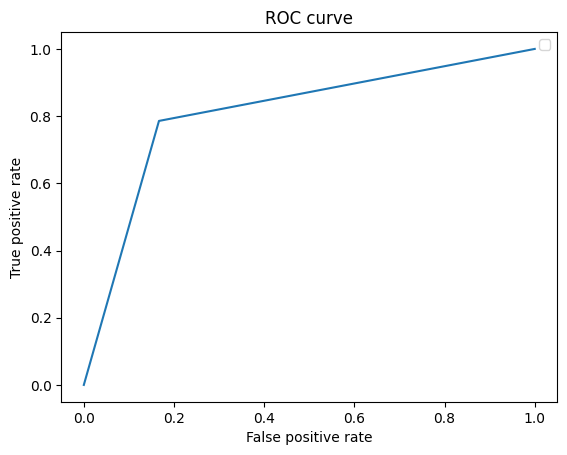

-----------------12th--LODA---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[224   0]
 [  0 246]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    224.0  246.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8082978723404256

 5 fold cv =  0.8051063829787235
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[37 15]
 [12 54]]
 ACCURACY SCORE:
0.7712
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.7399242424242425

 5 fold cv =  0.7559782608695652

 RoC AUC Score::  0.76486013986014


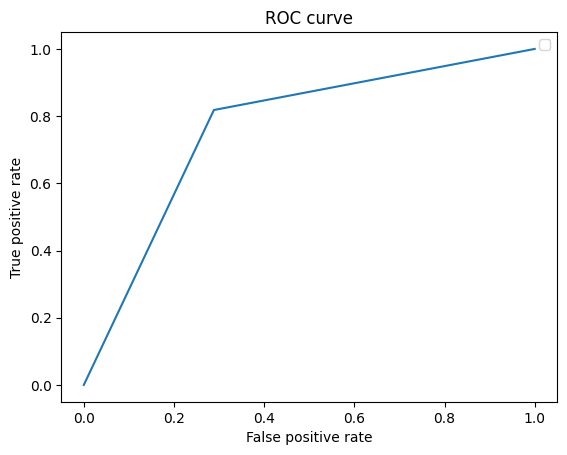

-----------------13th--SUOD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[207   0]
 [  0 265]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    207.0  265.0       1.0      472.0         472.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8305452127659576

 5 fold cv =  0.8322082866741323
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[35 10]
 [11 63]]
 ACCURACY SCORE:
0.8235
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 10 fold cv =  0.8375757575757575

 5 fold cv =  0.8386231884057971

 RoC AUC Score::  0.8145645645645646


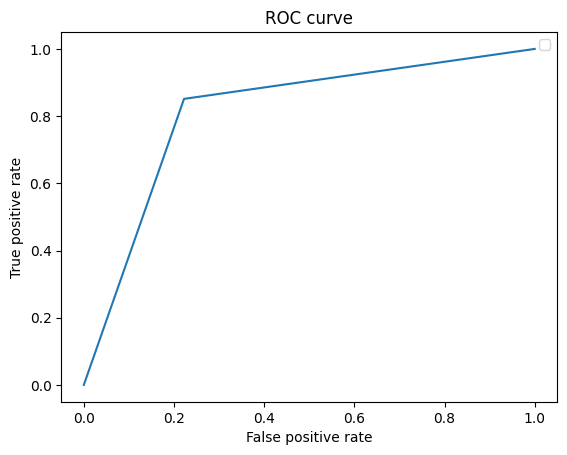

-----------------14th--DeepSVDD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[213   0]
 [  0 257]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    213.0  257.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8589361702127661

 5 fold cv =  0.8542553191489363
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[34 14]
 [11 59]]
 ACCURACY SCORE:
0.7881
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weight

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7558695652173913

 RoC AUC Score::  0.7755952380952381


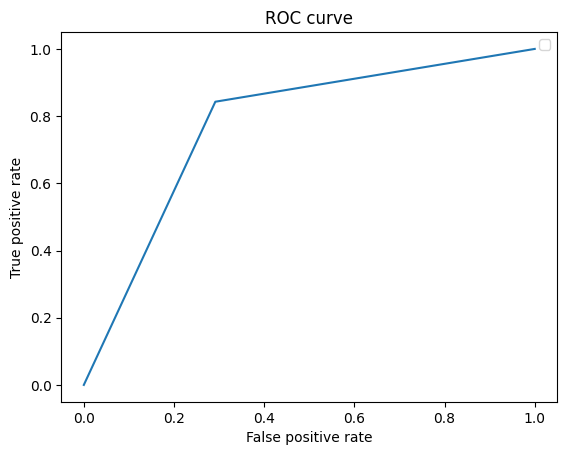

-----------------15th--ALAD---------------

----Model-- DecisionTreeClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[229   0]
 [  0 241]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    229.0  241.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8406382978723406

 5 fold cv =  0.8378723404255318
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[42 13]
 [12 51]]
 ACCURACY SCORE:
0.7881
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.745036231884058

 RoC AUC Score::  0.7865800865800866


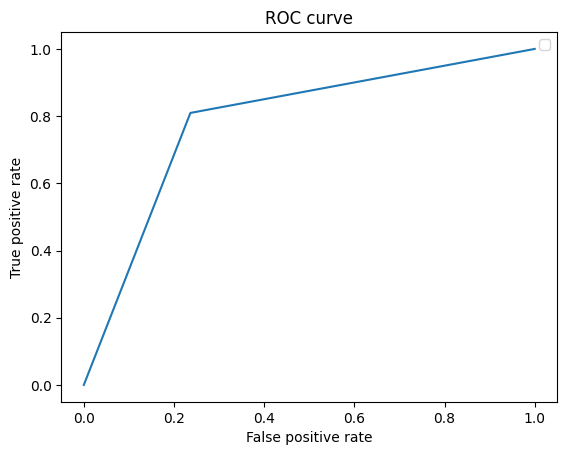

In [43]:
d_tr = DecisionTreeClassifier()
print("-----------------1st--KNN---------------")
d_tr.fit(X_train1, y_train1)
evaluate(d_tr, X_train1, X_test1, y_train1, y_test1)
print("-----------------2nd--ABOD---------------")
d_tr.fit(X_train2, y_train2)
evaluate(d_tr, X_train2, X_test2, y_train2, y_test2)
print("-----------------3rd--ECOD---------------")
d_tr.fit(X_train3, y_train3)
evaluate(d_tr, X_train3, X_test3, y_train3, y_test3)
print("-----------------4th--COPOD---------------")
d_tr.fit(X_train4, y_train4)
evaluate(d_tr, X_train4, X_test4, y_train4, y_test4)
print("-----------------5th--CBLOF---------------")
d_tr.fit(X_train5, y_train5)
evaluate(d_tr, X_train5, X_test5, y_train5, y_test5)
print("-----------------6th--FB---------------")
d_tr.fit(X_train6, y_train6)
evaluate(d_tr, X_train6, X_test6, y_train6, y_test6)
print("-----------------7th--IFOREST---------------")
d_tr.fit(X_train7, y_train7)
evaluate(d_tr, X_train7, X_test7, y_train7, y_test7)
print("-----------------8th--LOF---------------")
d_tr.fit(X_train8, y_train8)
evaluate(d_tr, X_train8, X_test8, y_train8, y_test8)
print("-----------------9th--ROD---------------")
d_tr.fit(X_train9, y_train9)
evaluate(d_tr, X_train9, X_test9, y_train9, y_test9)
print("-----------------10th--INNE---------------")
d_tr.fit(X_train10, y_train10)
evaluate(d_tr, X_train10, X_test10, y_train10, y_test10)
'''print("-----------------11th--XGBOD---------------")
d_tr.fit(X_train11, y_train11)
evaluate(d_tr,X_train11,X_test11,y_train11,y_test11)'''
print("-----------------12th--LODA---------------")
d_tr.fit(X_train12, y_train12)
evaluate(d_tr, X_train12, X_test12, y_train12, y_test12)
print("-----------------13th--SUOD---------------")
d_tr.fit(X_train13, y_train13)
evaluate(d_tr, X_train13, X_test13, y_train13, y_test13)
print("-----------------14th--DeepSVDD---------------")
d_tr.fit(X_train14, y_train14)
evaluate(d_tr, X_train14, X_test14, y_train14, y_test14)
print("-----------------15th--ALAD---------------")
d_tr.fit(X_train15, y_train15)
evaluate(d_tr, X_train15, X_test15, y_train15, y_test15)

-----------------1st--KNN---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[218   0]
 [  0 261]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    218.0  261.0       1.0      479.0         479.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.9026817375886526

 5 fold cv =  0.9027127192982456
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[49  1]
 [ 8 62]]
 ACCURACY SCORE:
0.9250
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.9116666666666667

 RoC AUC Score::  0.9814285714285714


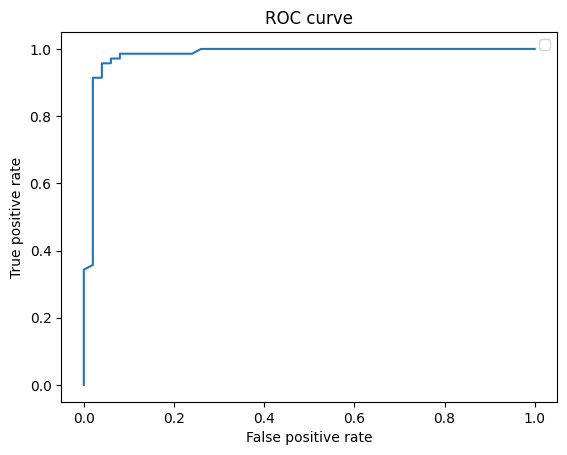

-----------------2nd--ABOD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[219   0]
 [  0 249]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    219.0  249.0       1.0      468.0         468.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.9147086031452359

 5 fold cv =  0.9132418210935712
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[45  3]
 [12 58]]
 ACCURACY SCORE:
0.8729
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro av

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8778260869565218

 RoC AUC Score::  0.9613095238095238


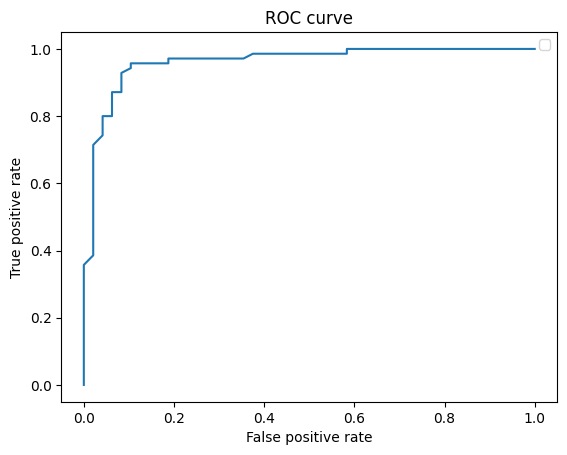

-----------------3rd--ECOD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[199   0]
 [  0 271]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    199.0  271.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8627659574468086

 5 fold cv =  0.863404255319149
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[42  3]
 [ 7 66]]
 ACCURACY SCORE:
0.9153
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8347463768115942

 RoC AUC Score::  0.9339421613394217


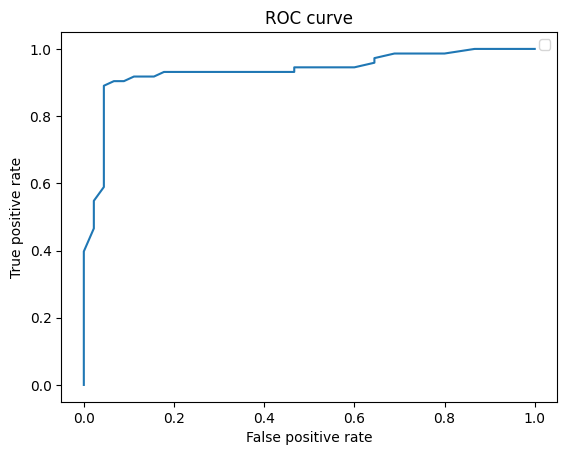

-----------------4th--COPOD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[198   0]
 [  0 272]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    198.0  272.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8768085106382979

 5 fold cv =  0.873404255319149
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[34  8]
 [ 6 70]]
 ACCURACY SCORE:
0.8814
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro av

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.841376811594203

 RoC AUC Score::  0.9022556390977443


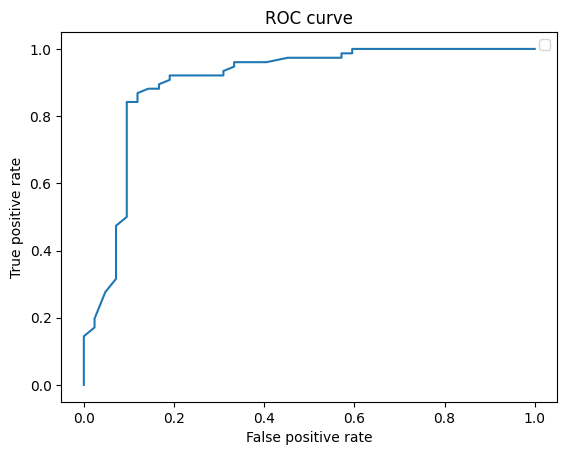

-----------------5th--CBLOF---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[224   0]
 [  0 246]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    224.0  246.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.9157446808510639

 5 fold cv =  0.9148936170212767
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[48  2]
 [13 55]]
 ACCURACY SCORE:
0.8729
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8668840579710144

 RoC AUC Score::  0.9113235294117648


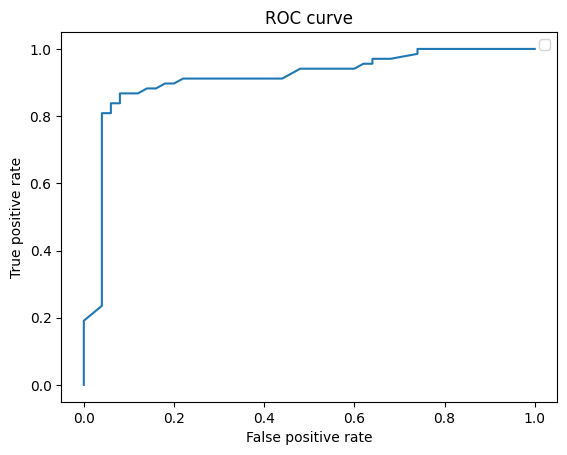

-----------------6th--FB---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[220   0]
 [  0 258]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    220.0  258.0       1.0      478.0         478.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8945611702127659

 5 fold cv =  0.8952149122807017
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[47  1]
 [11 61]]
 ACCURACY SCORE:
0.9000
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.9016666666666667

 RoC AUC Score::  0.9840856481481481


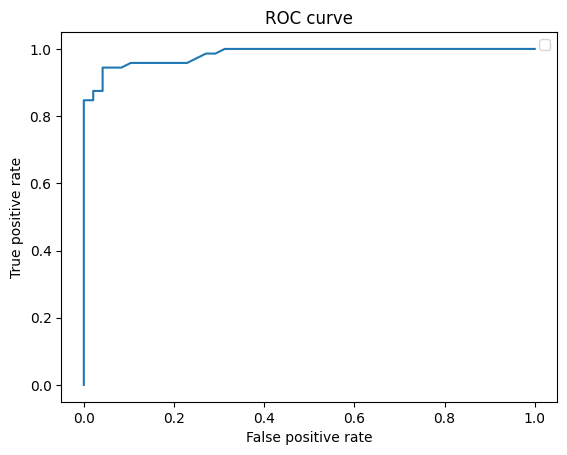

-----------------7th--IFOREST---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[215   0]
 [  0 255]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    215.0  255.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8942553191489363

 5 fold cv =  0.8953191489361703
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[42  4]
 [10 62]]
 ACCURACY SCORE:
0.8814
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8634057971014493

 RoC AUC Score::  0.9382548309178744


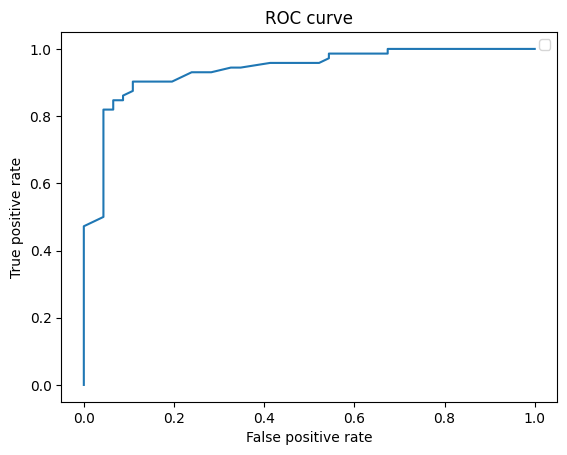

-----------------8th--LOF---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[226   0]
 [  0 249]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    226.0  249.0       1.0      475.0         475.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.9125664893617023

 5 fold cv =  0.9151578947368421
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[50  2]
 [11 56]]
 ACCURACY SCORE:
0.8908
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8631521739130436

 RoC AUC Score::  0.945752009184845


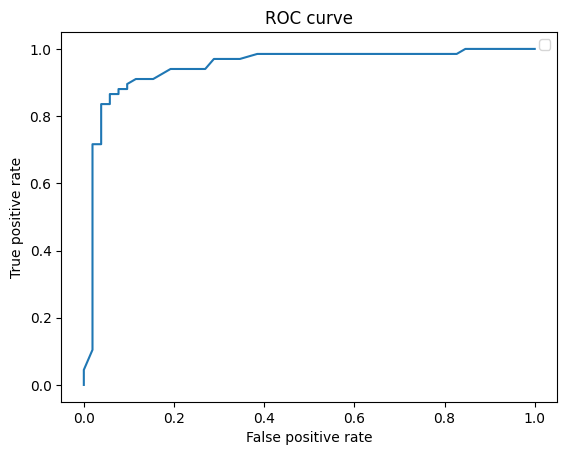

-----------------9th--ROD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[193   0]
 [  0 277]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    193.0  277.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8642553191489364

 5 fold cv =  0.8638297872340427
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[35  6]
 [ 9 68]]
 ACCURACY SCORE:
0.8729
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8114130434782608

 RoC AUC Score::  0.9399746594868547


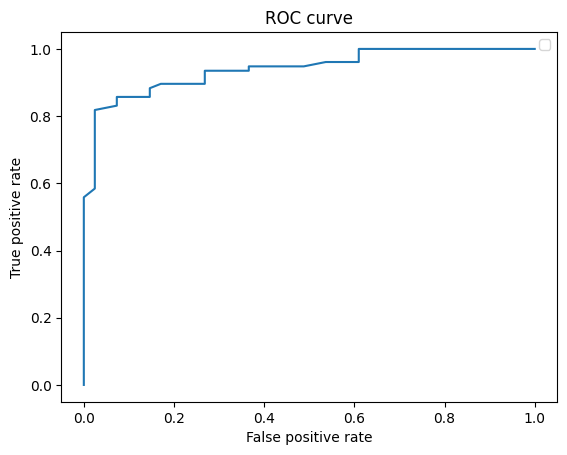

-----------------10th--INNE---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[216   0]
 [  0 254]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    216.0  254.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.9223404255319149

 5 fold cv =  0.9268085106382979
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[43  5]
 [10 60]]
 ACCURACY SCORE:
0.8729
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8085144927536231

 RoC AUC Score::  0.9025297619047619


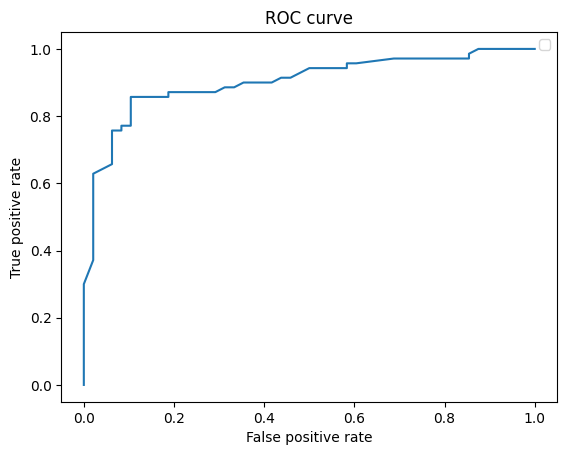

-----------------12th--LODA---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[224   0]
 [  0 246]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    224.0  246.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8651063829787234

 5 fold cv =  0.8672340425531915
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[48  4]
 [11 55]]
 ACCURACY SCORE:
0.8729
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8334420289855072

 RoC AUC Score::  0.9431818181818181


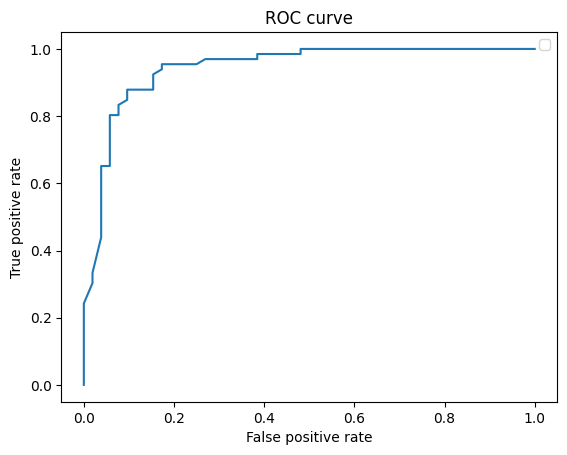

-----------------13th--SUOD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[207   0]
 [  0 265]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    207.0  265.0       1.0      472.0         472.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8870700354609931

 5 fold cv =  0.8836909294512878
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[39  6]
 [ 9 65]]
 ACCURACY SCORE:
0.8739
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.876376811594203

 RoC AUC Score::  0.9492492492492492


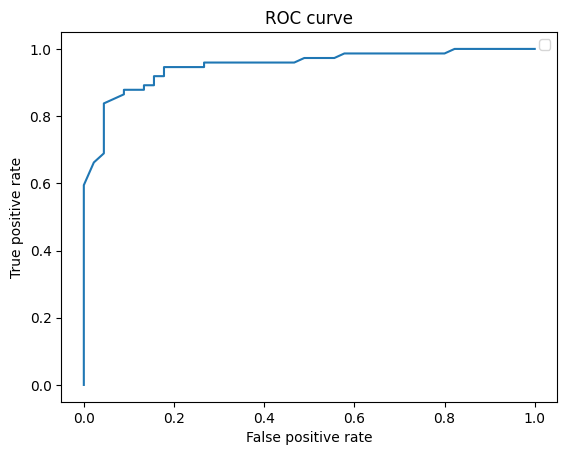

-----------------14th--DeepSVDD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[213   0]
 [  0 257]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    213.0  257.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8972340425531915

 5 fold cv =  0.8961702127659577
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[40  8]
 [14 56]]
 ACCURACY SCORE:
0.8136
 CLASSIFICATION REPORT:
                   0          1  accuracy   mac

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8265579710144928

 RoC AUC Score::  0.8836309523809525


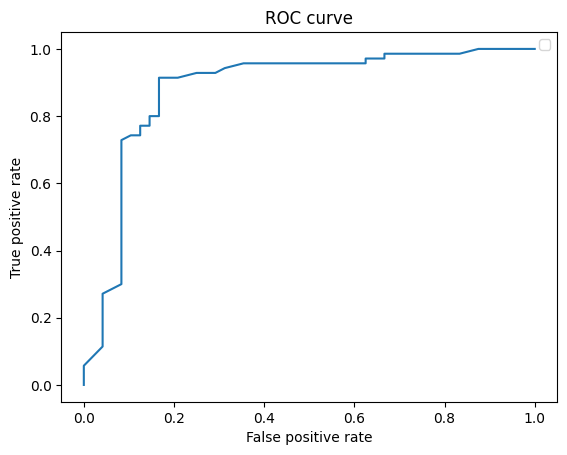

-----------------15th--ALAD---------------

----Model-- RandomForestClassifier(random_state=0)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[229   0]
 [  0 241]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    229.0  241.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8925531914893619

 5 fold cv =  0.8942553191489363
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[48  7]
 [10 53]]
 ACCURACY SCORE:
0.8559
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro a

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8188768115942028

 RoC AUC Score::  0.9411255411255411


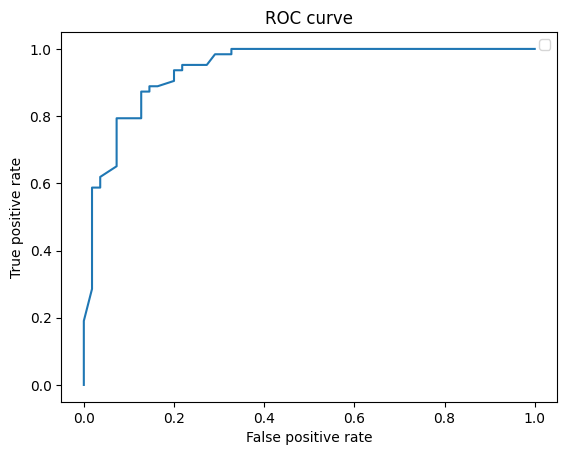

In [44]:
rf_clf = RandomForestClassifier(random_state=0, n_estimators=100)
print("-----------------1st--KNN---------------")
rf_clf.fit(X_train1, y_train1)
evaluate(rf_clf, X_train1, X_test1, y_train1, y_test1)
print("-----------------2nd--ABOD---------------")
rf_clf.fit(X_train2, y_train2)
evaluate(rf_clf, X_train2, X_test2, y_train2, y_test2)
print("-----------------3rd--ECOD---------------")
rf_clf.fit(X_train3, y_train3)
evaluate(rf_clf, X_train3, X_test3, y_train3, y_test3)
print("-----------------4th--COPOD---------------")
rf_clf.fit(X_train4, y_train4)
evaluate(rf_clf, X_train4, X_test4, y_train4, y_test4)
print("-----------------5th--CBLOF---------------")
rf_clf.fit(X_train5, y_train5)
evaluate(rf_clf, X_train5, X_test5, y_train5, y_test5)
print("-----------------6th--FB---------------")
rf_clf.fit(X_train6, y_train6)
evaluate(rf_clf, X_train6, X_test6, y_train6, y_test6)
print("-----------------7th--IFOREST---------------")
rf_clf.fit(X_train7, y_train7)
evaluate(rf_clf, X_train7, X_test7, y_train7, y_test7)
print("-----------------8th--LOF---------------")
rf_clf.fit(X_train8, y_train8)
evaluate(rf_clf, X_train8, X_test8, y_train8, y_test8)
print("-----------------9th--ROD---------------")
rf_clf.fit(X_train9, y_train9)
evaluate(rf_clf, X_train9, X_test9, y_train9, y_test9)
print("-----------------10th--INNE---------------")
rf_clf.fit(X_train10, y_train10)
evaluate(rf_clf, X_train10, X_test10, y_train10, y_test10)
'''print("-----------------11th--XGBOD---------------")
rf_clf.fit(X_train11, y_train11)
evaluate(rf_clf, X_train11, X_test11, y_train11, y_test11)'''
print("-----------------12th--LODA---------------")
rf_clf.fit(X_train12, y_train12)
evaluate(rf_clf, X_train12, X_test12, y_train12, y_test12)
print("-----------------13th--SUOD---------------")
rf_clf.fit(X_train13, y_train13)
evaluate(rf_clf, X_train13, X_test13, y_train13, y_test13)
print("-----------------14th--DeepSVDD---------------")
rf_clf.fit(X_train14, y_train14)
evaluate(rf_clf, X_train14, X_test14, y_train14, y_test14)
print("-----------------15th--ALAD---------------")
rf_clf.fit(X_train15, y_train15)
evaluate(rf_clf, X_train15, X_test15, y_train15, y_test15)

-----------------1st--KNN---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[205  13]
 [ 21 240]]
 ACCURACY SCORE:
0.9290
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.907080    0.948617  0.929019    0.927848      0.929713
recall       0.940367    0.919540  0.929019    0.929954      0.929019
f1-score     0.923423    0.933852  0.929019    0.928638      0.929106
support    218.000000  261.000000  0.929019  479.000000    479.000000

 MCC = 0.8577991406294471

 specificity =  0.9403669724770642

 Cohen Kappa =  0.8573155773611354

 F1 Score =  0.9338521400778209

 Precision =  0.9486166007905138

 Recall =  0.9195402298850575

 10 fold cv =  0.8738652482269503

 5 fold cv =  0.8757631578947369
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION M

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8275

 RoC AUC Score::  0.9694285714285714


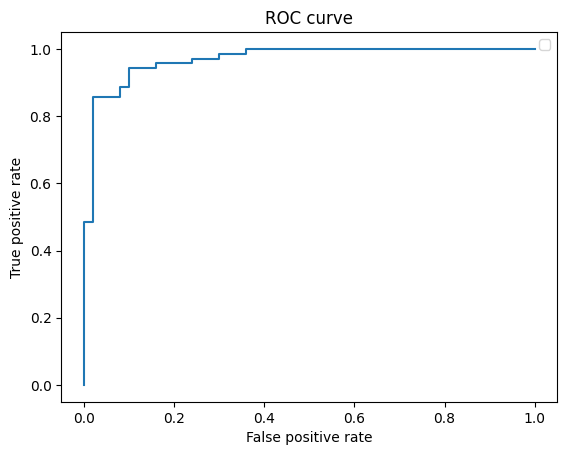

-----------------2nd--ABOD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[206  13]
 [ 19 230]]
 ACCURACY SCORE:
0.9316
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.915556    0.946502  0.931624    0.931029      0.932021
recall       0.940639    0.923695  0.931624    0.932167      0.931624
f1-score     0.927928    0.934959  0.931624    0.931444      0.931669
support    219.000000  249.000000  0.931624  468.000000    468.000000

 MCC = 0.863195080413504

 specificity =  0.9406392694063926

 Cohen Kappa =  0.8629098698302851

 F1 Score =  0.934959349593496

 Precision =  0.9465020576131687

 Recall =  0.9236947791164659

 10 fold cv =  0.8773681776133209

 5 fold cv =  0.8758865248226949
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8220289855072465

 RoC AUC Score::  0.9577380952380952


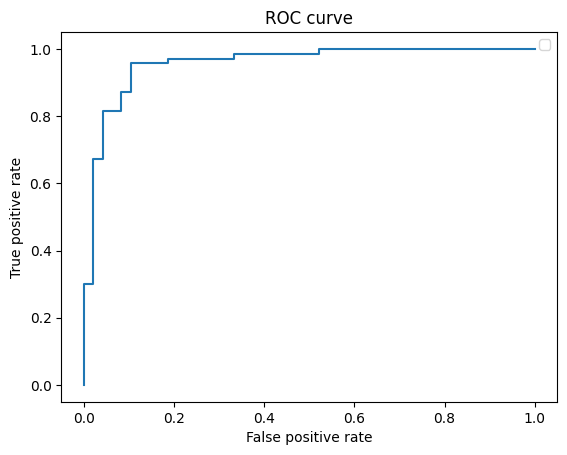

-----------------3rd--ECOD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[183  16]
 [ 26 245]]
 ACCURACY SCORE:
0.9106
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.875598    0.938697  0.910638    0.907148      0.911981
recall       0.919598    0.904059  0.910638    0.911829      0.910638
f1-score     0.897059    0.921053  0.910638    0.909056      0.910894
support    199.000000  271.000000  0.910638  470.000000    470.000000

 MCC = 0.818962840762578

 specificity =  0.9195979899497487

 Cohen Kappa =  0.818195214500175

 F1 Score =  0.9210526315789475

 Precision =  0.9386973180076629

 Recall =  0.9040590405904059

 10 fold cv =  0.843404255319149

 5 fold cv =  0.8419148936170214
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MAT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7921739130434782

 RoC AUC Score::  0.9159817351598174


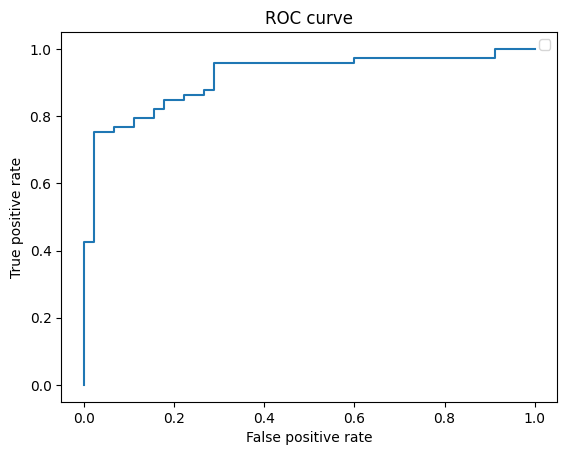

-----------------4th--COPOD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[183  15]
 [ 22 250]]
 ACCURACY SCORE:
0.9213
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.892683    0.943396  0.921277    0.918040      0.922032
recall       0.924242    0.919118  0.921277    0.921680      0.921277
f1-score     0.908189    0.931099  0.921277    0.919644      0.921447
support    198.000000  272.000000  0.921277  470.000000    470.000000

 MCC = 0.8397117209457378

 specificity =  0.9242424242424242

 Cohen Kappa =  0.8393236625704519

 F1 Score =  0.931098696461825

 Precision =  0.9433962264150944

 Recall =  0.9191176470588235

 10 fold cv =  0.8463829787234043

 5 fold cv =  0.8472340425531916
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7628260869565219

 RoC AUC Score::  0.8616854636591478


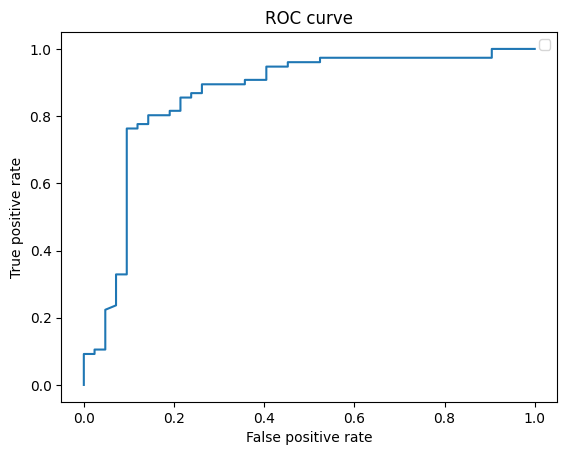

-----------------5th--CBLOF---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[213  11]
 [ 15 231]]
 ACCURACY SCORE:
0.9447
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.934211    0.954545  0.944681    0.944378      0.944854
recall       0.950893    0.939024  0.944681    0.944959      0.944681
f1-score     0.942478    0.946721  0.944681    0.944600      0.944699
support    224.000000  246.000000  0.944681  470.000000    470.000000

 MCC = 0.8893364245810231

 specificity =  0.9508928571428571

 Cohen Kappa =  0.8892072241967071

 F1 Score =  0.9467213114754098

 Precision =  0.9545454545454546

 Recall =  0.9390243902439024

 10 fold cv =  0.9038297872340425

 5 fold cv =  0.8997872340425532
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8240217391304349

 RoC AUC Score::  0.9008823529411766


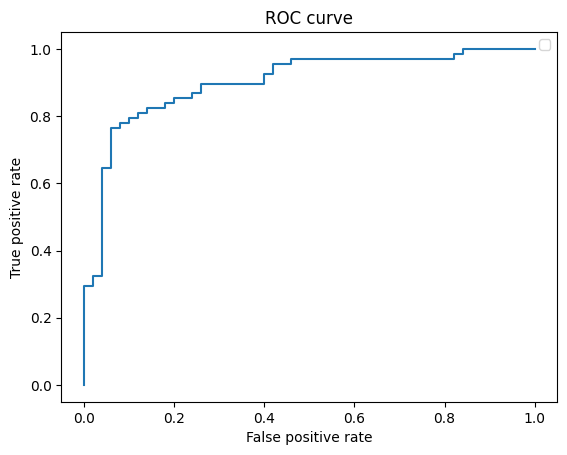

-----------------6th--FB---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[211   9]
 [ 25 233]]
 ACCURACY SCORE:
0.9289
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.894068    0.962810   0.92887    0.928439      0.931171
recall       0.959091    0.903101   0.92887    0.931096      0.928870
f1-score     0.925439    0.932000   0.92887    0.928719      0.928980
support    220.000000  258.000000   0.92887  478.000000    478.000000

 MCC = 0.8595305924921928

 specificity =  0.9590909090909091

 Cohen Kappa =  0.8575984859105565

 F1 Score =  0.932

 Precision =  0.9628099173553719

 Recall =  0.9031007751937985

 10 fold cv =  0.8753191489361702

 5 fold cv =  0.8768201754385965
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[47  1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8866666666666668

 RoC AUC Score::  0.9696180555555556


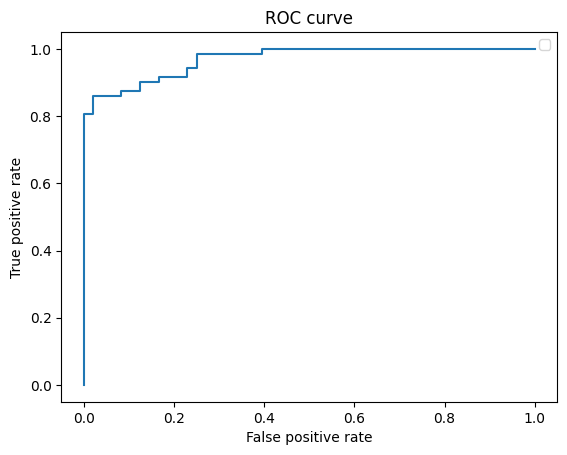

-----------------7th--IFOREST---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[201  14]
 [ 22 233]]
 ACCURACY SCORE:
0.9234
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.901345    0.943320  0.923404    0.922333      0.924119
recall       0.934884    0.913725  0.923404    0.924305      0.923404
f1-score     0.917808    0.928287  0.923404    0.923048      0.923493
support    215.000000  255.000000  0.923404  470.000000    470.000000

 MCC = 0.8466348736272759

 specificity =  0.9348837209302325

 Cohen Kappa =  0.8461398563244521

 F1 Score =  0.9282868525896414

 Precision =  0.9433198380566802

 Recall =  0.9137254901960784

 10 fold cv =  0.8617021276595745

 5 fold cv =  0.8591489361702129
-----------------------TESTING RESULTS-------------------------- 

 CONFUSI

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8101086956521739

 RoC AUC Score::  0.9347826086956522


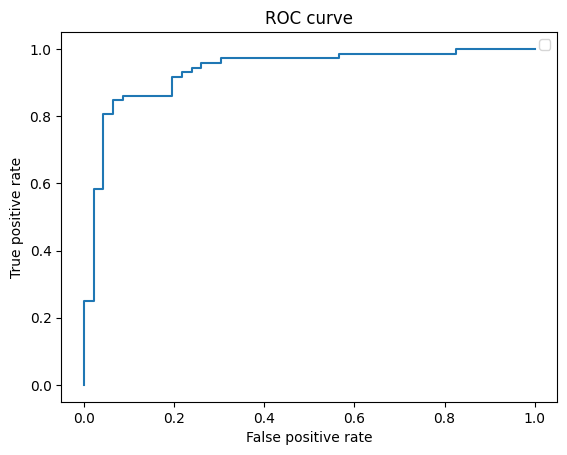

-----------------8th--LOF---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[218   8]
 [ 19 230]]
 ACCURACY SCORE:
0.9432
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.919831    0.966387  0.943158    0.943109      0.944236
recall       0.964602    0.923695  0.943158    0.944148      0.943158
f1-score     0.941685    0.944559  0.943158    0.943122      0.943191
support    226.000000  249.000000  0.943158  475.000000    475.000000

 MCC = 0.8872565548403631

 specificity =  0.9646017699115044

 Cohen Kappa =  0.8863041994308561

 F1 Score =  0.9445585215605751

 Precision =  0.9663865546218487

 Recall =  0.9236947791164659

 10 fold cv =  0.8908599290780143

 5 fold cv =  0.8962105263157896
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION M

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8068840579710144

 RoC AUC Score::  0.9216417910447762


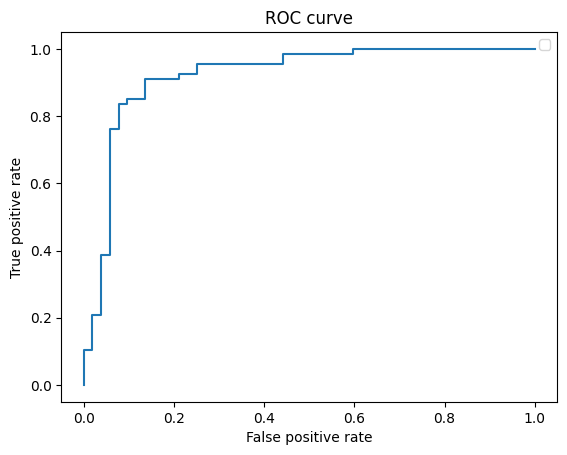

-----------------9th--ROD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[176  17]
 [ 24 253]]
 ACCURACY SCORE:
0.9128
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.880000    0.937037  0.912766    0.908519      0.913615
recall       0.911917    0.913357  0.912766    0.912637      0.912766
f1-score     0.895674    0.925046  0.912766    0.910360      0.912985
support    193.000000  277.000000  0.912766  470.000000    470.000000

 MCC = 0.8211454387269863

 specificity =  0.9119170984455959

 Cohen Kappa =  0.8207608594549345

 F1 Score =  0.9250457038391224

 Precision =  0.937037037037037

 Recall =  0.9133574007220217

 10 fold cv =  0.8338297872340427

 5 fold cv =  0.8229787234042553
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8053985507246376

 RoC AUC Score::  0.9404497941083307


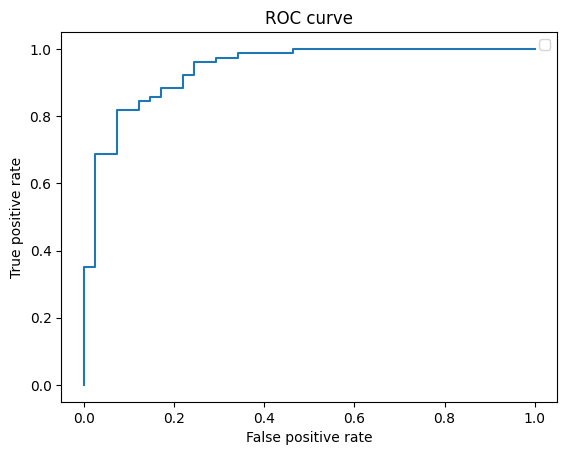

-----------------10th--INNE---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[204  12]
 [ 14 240]]
 ACCURACY SCORE:
0.9447
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.935780    0.952381  0.944681    0.944080      0.944751
recall       0.944444    0.944882  0.944681    0.944663      0.944681
f1-score     0.940092    0.948617  0.944681    0.944354      0.944699
support    216.000000  254.000000  0.944681  470.000000    470.000000

 MCC = 0.8887433604751674

 specificity =  0.9444444444444444

 Cohen Kappa =  0.8887107937780044

 F1 Score =  0.9486166007905138

 Precision =  0.9523809523809523

 Recall =  0.9448818897637795

 10 fold cv =  0.8921276595744682

 5 fold cv =  0.892340425531915
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7565217391304349

 RoC AUC Score::  0.8863095238095238


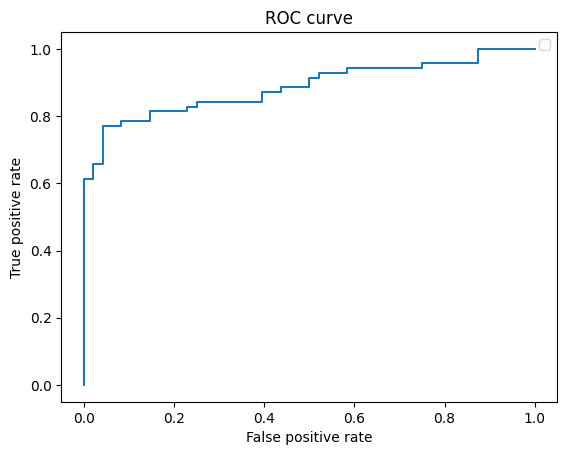

-----------------12th--LODA---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[208  16]
 [ 24 222]]
 ACCURACY SCORE:
0.9149
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.896552    0.932773  0.914894    0.914662      0.915510
recall       0.928571    0.902439  0.914894    0.915505      0.914894
f1-score     0.912281    0.917355  0.914894    0.914818      0.914937
support    224.000000  246.000000  0.914894  470.000000    470.000000

 MCC = 0.8301672153493118

 specificity =  0.9285714285714286

 Cohen Kappa =  0.8296854616611102

 F1 Score =  0.9173553719008264

 Precision =  0.9327731092436975

 Recall =  0.9024390243902439

 10 fold cv =  0.8406382978723405

 5 fold cv =  0.8395744680851065
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7745289855072464

 RoC AUC Score::  0.9195804195804196


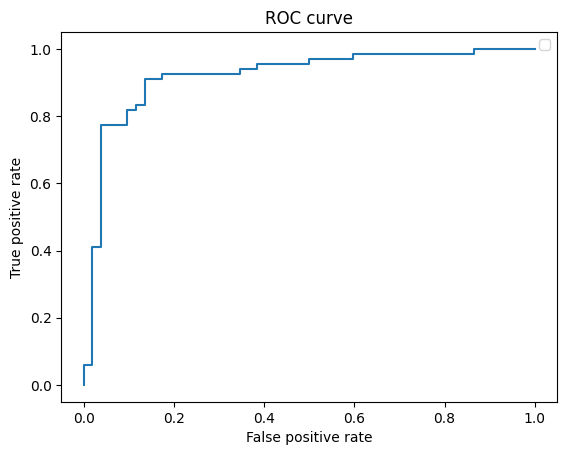

-----------------13th--SUOD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[190  17]
 [ 17 248]]
 ACCURACY SCORE:
0.9280
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.917874    0.935849  0.927966    0.926862      0.927966
recall       0.917874    0.935849  0.927966    0.926862      0.927966
f1-score     0.917874    0.935849  0.927966    0.926862      0.927966
support    207.000000  265.000000  0.927966  472.000000    472.000000

 MCC = 0.8537234527390393

 specificity =  0.9178743961352657

 Cohen Kappa =  0.8537234527390393

 F1 Score =  0.9358490566037736

 Precision =  0.9358490566037736

 Recall =  0.9358490566037736

 10 fold cv =  0.8631959219858157

 5 fold cv =  0.8673818589025757
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7731521739130436

 RoC AUC Score::  0.9327327327327327


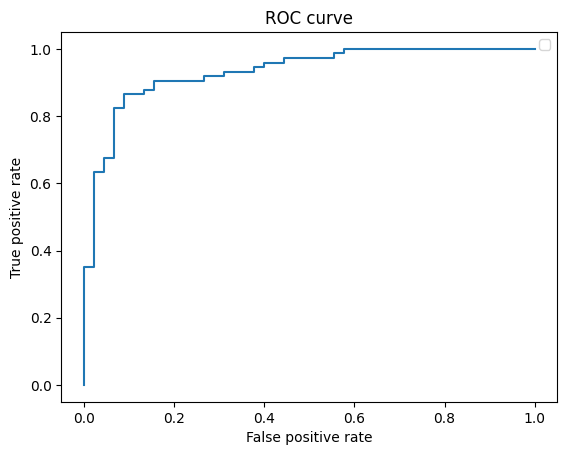

-----------------14th--DeepSVDD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[197  16]
 [ 19 238]]
 ACCURACY SCORE:
0.9255
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.912037    0.937008  0.925532    0.924522      0.925691
recall       0.924883    0.926070  0.925532    0.925476      0.925532
f1-score     0.918415    0.931507  0.925532    0.924961      0.925574
support    213.000000  257.000000  0.925532  470.000000    470.000000

 MCC = 0.8499982543087288

 specificity =  0.9248826291079812

 Cohen Kappa =  0.8499279289141898

 F1 Score =  0.9315068493150686

 Precision =  0.937007874015748

 Recall =  0.9260700389105059

 10 fold cv =  0.8668085106382979

 5 fold cv =  0.8661702127659576
-----------------------TESTING RESULTS-------------------------- 

 CONFUS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.766557971014493

 RoC AUC Score::  0.9136904761904763


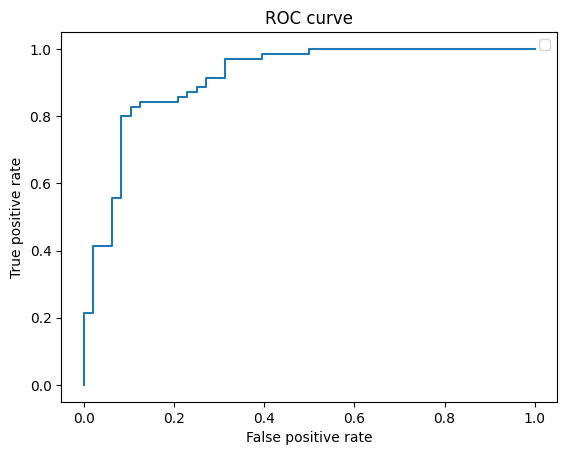

-----------------15th--ALAD---------------

----Model-- AdaBoostClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[217  12]
 [ 19 222]]
 ACCURACY SCORE:
0.9340
 CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.919492    0.948718  0.934043    0.934105      0.934478
recall       0.947598    0.921162  0.934043    0.934380      0.934043
f1-score     0.933333    0.934737  0.934043    0.934035      0.934053
support    229.000000  241.000000  0.934043  470.000000    470.000000

 MCC = 0.8684847329371759

 specificity =  0.9475982532751092

 Cohen Kappa =  0.8680994369104307

 F1 Score =  0.9347368421052631

 Precision =  0.9487179487179487

 Recall =  0.921161825726141

 10 fold cv =  0.8657446808510639

 5 fold cv =  0.8653191489361705
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7487318840579711

 RoC AUC Score::  0.9142857142857143


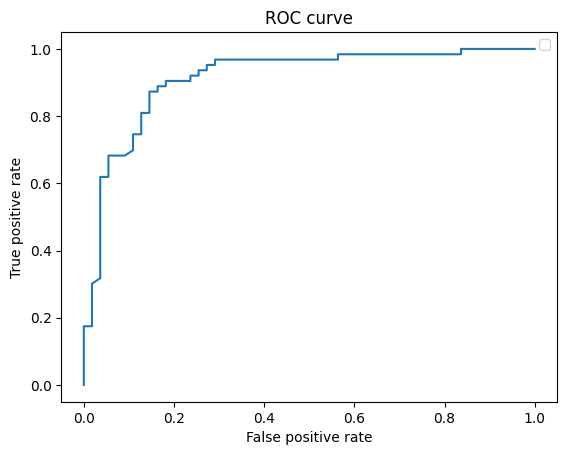

In [46]:
ada_boost_clf = AdaBoostClassifier(n_estimators=50)
print("-----------------1st--KNN---------------")
ada_boost_clf.fit(X_train1, y_train1)
evaluate(ada_boost_clf, X_train1, X_test1, y_train1, y_test1)
print("-----------------2nd--ABOD---------------")
ada_boost_clf.fit(X_train2, y_train2)
evaluate(ada_boost_clf, X_train2, X_test2, y_train2, y_test2)
print("-----------------3rd--ECOD---------------")
ada_boost_clf.fit(X_train3, y_train3)
evaluate(ada_boost_clf, X_train3, X_test3, y_train3, y_test3)
print("-----------------4th--COPOD---------------")
ada_boost_clf.fit(X_train4, y_train4)
evaluate(ada_boost_clf, X_train4, X_test4, y_train4, y_test4)
print("-----------------5th--CBLOF---------------")
ada_boost_clf.fit(X_train5, y_train5)
evaluate(ada_boost_clf, X_train5, X_test5, y_train5, y_test5)
print("-----------------6th--FB---------------")
ada_boost_clf.fit(X_train6, y_train6)
evaluate(ada_boost_clf, X_train6, X_test6, y_train6, y_test6)
print("-----------------7th--IFOREST---------------")
ada_boost_clf.fit(X_train7, y_train7)
evaluate(ada_boost_clf, X_train7, X_test7, y_train7, y_test7)
print("-----------------8th--LOF---------------")
ada_boost_clf.fit(X_train8, y_train8)
evaluate(ada_boost_clf, X_train8, X_test8, y_train8, y_test8)
print("-----------------9th--ROD---------------")
ada_boost_clf.fit(X_train9, y_train9)
evaluate(ada_boost_clf, X_train9, X_test9, y_train9, y_test9)
print("-----------------10th--INNE---------------")
ada_boost_clf.fit(X_train10, y_train10)
evaluate(ada_boost_clf, X_train10, X_test10, y_train10, y_test10)
#print("-----------------11th--XGBOD---------------")
#ada_boost_clf.fit(X_train11, y_train11)
#evaluate(ada_boost_clf, X_train11, X_test11, y_train11, y_test11)
print("-----------------12th--LODA---------------")
ada_boost_clf.fit(X_train12, y_train12)
evaluate(ada_boost_clf, X_train12, X_test12, y_train12, y_test12)
print("-----------------13th--SUOD---------------")
ada_boost_clf.fit(X_train13, y_train13)
evaluate(ada_boost_clf, X_train13, X_test13, y_train13, y_test13)
print("-----------------14th--DeepSVDD---------------")
ada_boost_clf.fit(X_train14, y_train14)
evaluate(ada_boost_clf, X_train14, X_test14, y_train14, y_test14)
print("-----------------15th--ALAD---------------")
ada_boost_clf.fit(X_train15, y_train15)
evaluate(ada_boost_clf, X_train15, X_test15, y_train15, y_test15)
#print("-----------------16th--AnoGAN---------------")
#ada_boost_clf.fit(X_train16, y_train16)
#evaluate(ada_boost_clf, X_train16, X_test16, y_train16, y_test16)

-----------------1st--KNN---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[218   0]
 [  0 261]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8791666666666665

 RoC AUC Score::  0.97


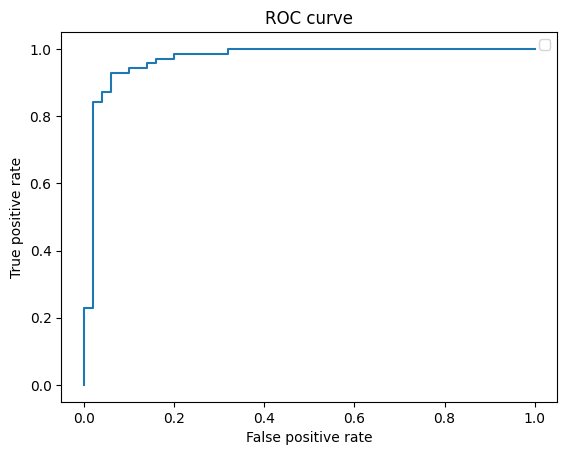

-----------------2nd--ABOD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[219   0]
 [  0 249]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.859963768115942

 RoC AUC Score::  0.9648809523809525


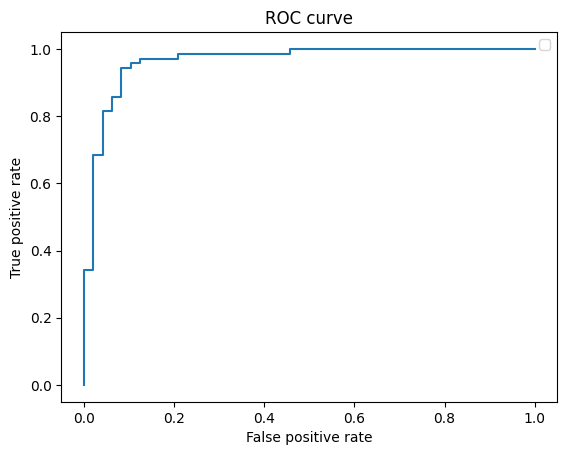

-----------------3rd--ECOD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[199   0]
 [  0 271]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8110507246376811

 RoC AUC Score::  0.9579908675799087


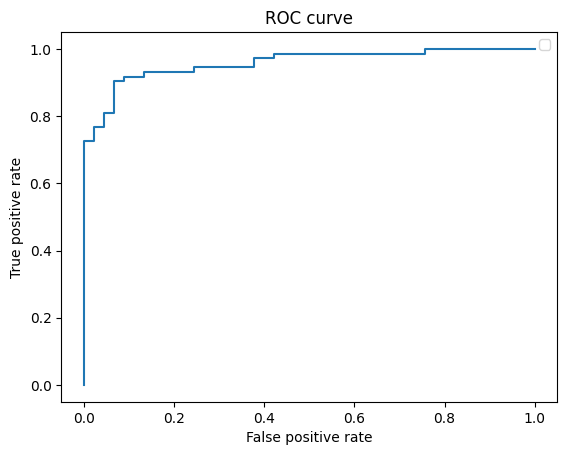

-----------------4th--COPOD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[198   0]
 [  0 272]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7981521739130435

 RoC AUC Score::  0.8994360902255639


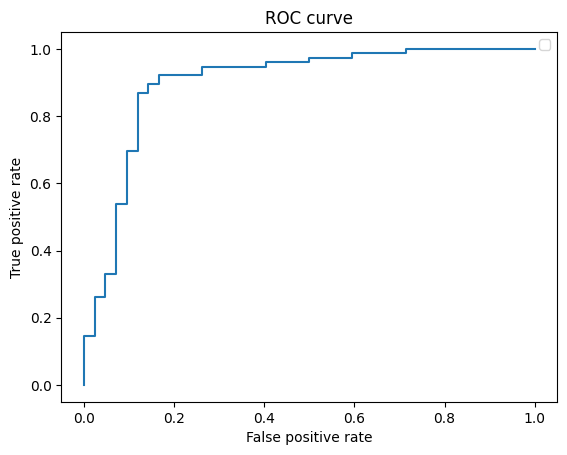

-----------------5th--CBLOF---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[224   0]
 [  0 246]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8284057971014492

 RoC AUC Score::  0.9370588235294117


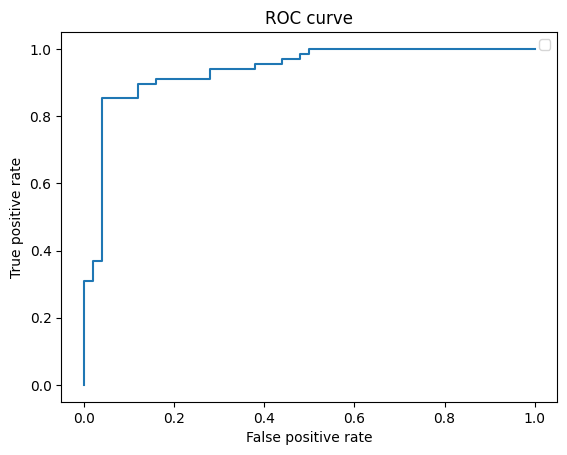

-----------------6th--FB---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[220   0]
 [  0 258]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.885

 RoC AUC Score::  0.9765625


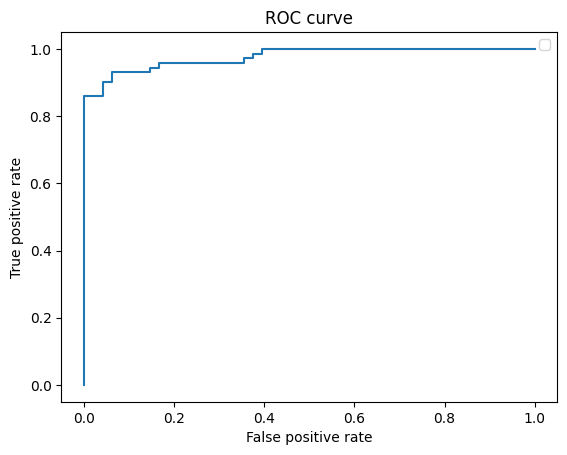

-----------------7th--IFOREST---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[215   0]
 [  0 255]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
             

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8549999999999999

 RoC AUC Score::  0.9399154589371981


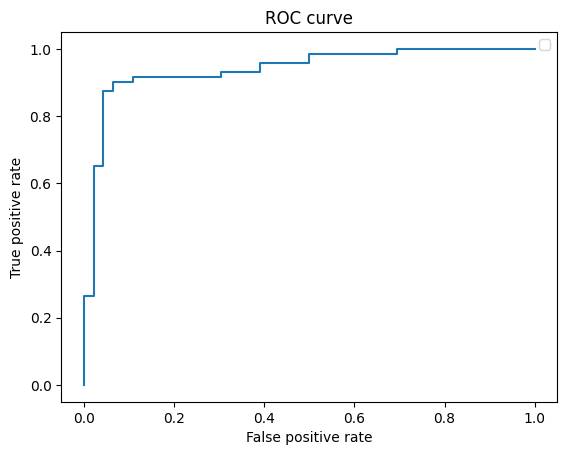

-----------------8th--LOF---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[226   0]
 [  0 249]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8430434782608696

 RoC AUC Score::  0.9443168771526981


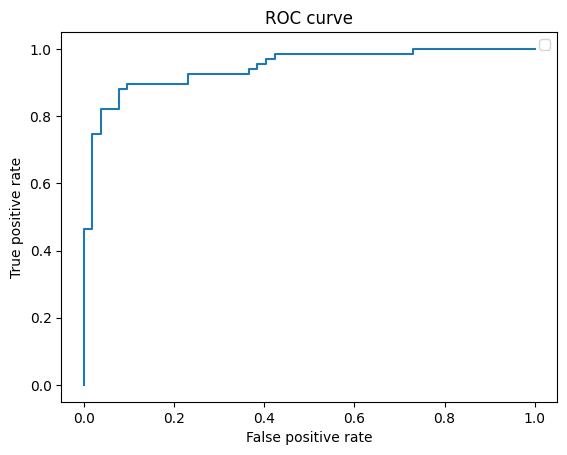

-----------------9th--ROD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[193   0]
 [  0 277]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8286231884057972

 RoC AUC Score::  0.9404497941083307


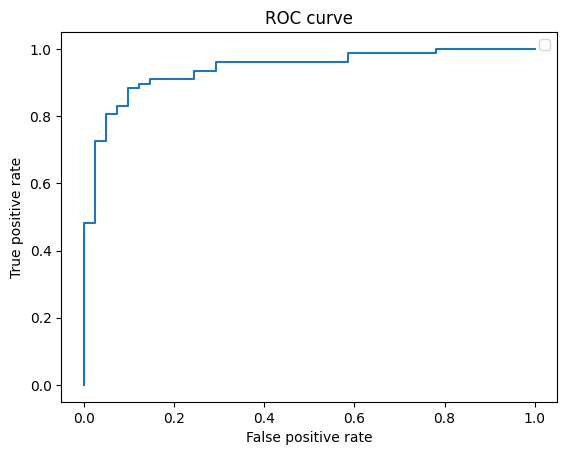

-----------------10th--INNE---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[216   0]
 [  0 254]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8067028985507246

 RoC AUC Score::  0.9056547619047619


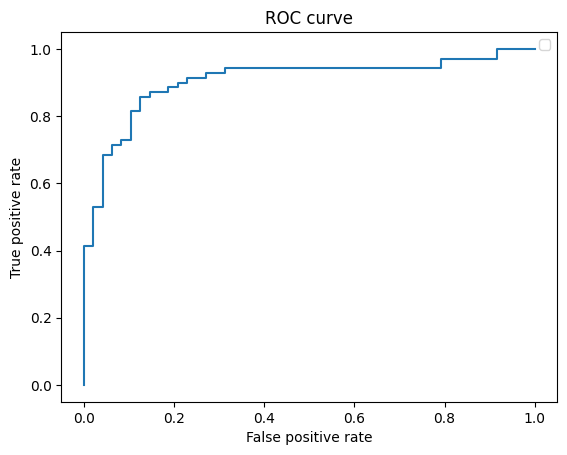

-----------------12th--LODA---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[224   0]
 [  0 246]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7947463768115942

 RoC AUC Score::  0.9475524475524476


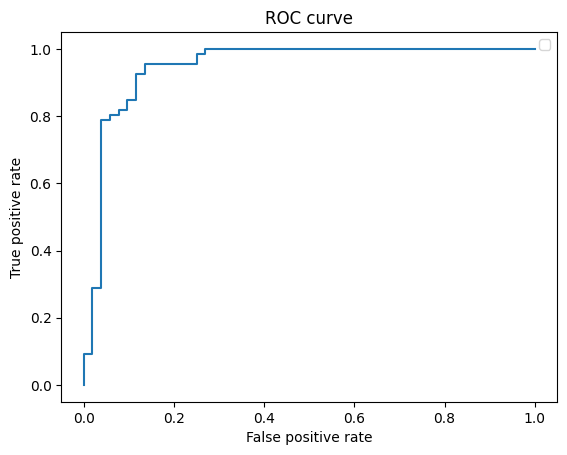

-----------------13th--SUOD--------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[207   0]
 [  0 265]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8403623188405797

 RoC AUC Score::  0.9606606606606606


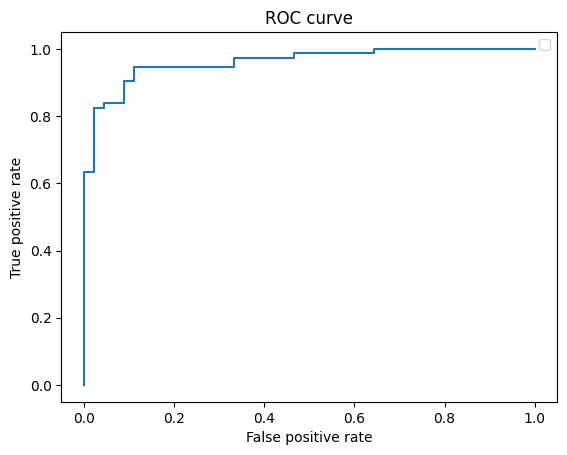

-----------------14th--DeepSVDD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[213   0]
 [  0 257]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8094565217391306

 RoC AUC Score::  0.9104166666666668


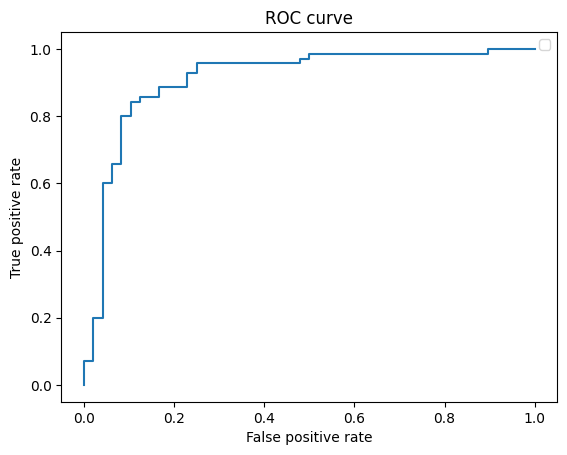

-----------------15th--ALAD---------------

----Model-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[229   0]
 [  0 241]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8247101449275362

 RoC AUC Score::  0.9391053391053391


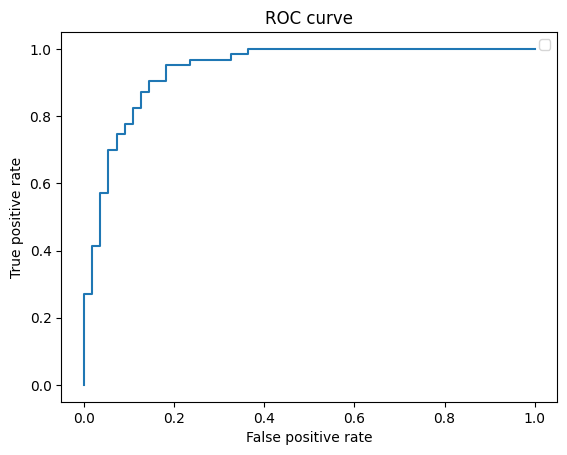

In [47]:
grad_boost_clf = XGBClassifier(n_estimators=100)
print("-----------------1st--KNN---------------")
grad_boost_clf.fit(X_train1, y_train1)
evaluate(grad_boost_clf, X_train1, X_test1, y_train1, y_test1)
print("-----------------2nd--ABOD---------------")
grad_boost_clf.fit(X_train2, y_train2)
evaluate(grad_boost_clf, X_train2, X_test2, y_train2, y_test2)
print("-----------------3rd--ECOD---------------")
grad_boost_clf.fit(X_train3, y_train3)
evaluate(grad_boost_clf, X_train3, X_test3, y_train3, y_test3)
print("-----------------4th--COPOD---------------")
grad_boost_clf.fit(X_train4, y_train4)
evaluate(grad_boost_clf, X_train4, X_test4, y_train4, y_test4)
print("-----------------5th--CBLOF---------------")
grad_boost_clf.fit(X_train5, y_train5)
evaluate(grad_boost_clf, X_train5, X_test5, y_train5, y_test5)
print("-----------------6th--FB---------------")
grad_boost_clf.fit(X_train6, y_train6)
evaluate(grad_boost_clf, X_train6, X_test6, y_train6, y_test6)
print("-----------------7th--IFOREST---------------")
grad_boost_clf.fit(X_train7, y_train7)
evaluate(grad_boost_clf, X_train7, X_test7, y_train7, y_test7)
print("-----------------8th--LOF---------------")
grad_boost_clf.fit(X_train8, y_train8)
evaluate(grad_boost_clf, X_train8, X_test8, y_train8, y_test8)
print("-----------------9th--ROD---------------")
grad_boost_clf.fit(X_train9, y_train9)
evaluate(grad_boost_clf, X_train9, X_test9, y_train9, y_test9)
print("-----------------10th--INNE---------------")
grad_boost_clf.fit(X_train10, y_train10)
evaluate(grad_boost_clf, X_train10, X_test10, y_train10, y_test10)
#print("-----------------11th--XGBOD---------------")
#grad_boost_clf.fit(X_train11, y_train11)
#evaluate(grad_boost_clf, X_train11, X_test11, y_train11, y_test11)
print("-----------------12th--LODA---------------")
grad_boost_clf.fit(X_train12, y_train12)
evaluate(grad_boost_clf, X_train12, X_test12, y_train12, y_test12)
print("-----------------13th--SUOD--------------")
grad_boost_clf.fit(X_train13, y_train13)
evaluate(grad_boost_clf, X_train13, X_test13, y_train13, y_test13)
print("-----------------14th--DeepSVDD---------------")
grad_boost_clf.fit(X_train14, y_train14)
evaluate(grad_boost_clf, X_train14, X_test14, y_train14, y_test14)
print("-----------------15th--ALAD---------------")
grad_boost_clf.fit(X_train15, y_train15)
evaluate(grad_boost_clf, X_train15, X_test15, y_train15, y_test15)

-----------------1st--KNN---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[218   0]
 [  0 261]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    218.0  261.0       1.0      479.0         479.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8980718085106382

 5 fold cv =  0.8933004385964911
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[47  3]
 [ 9 61]]
 ACCURACY SCORE:
0.9000
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precisi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8758333333333335

 RoC AUC Score::  0.9714285714285714


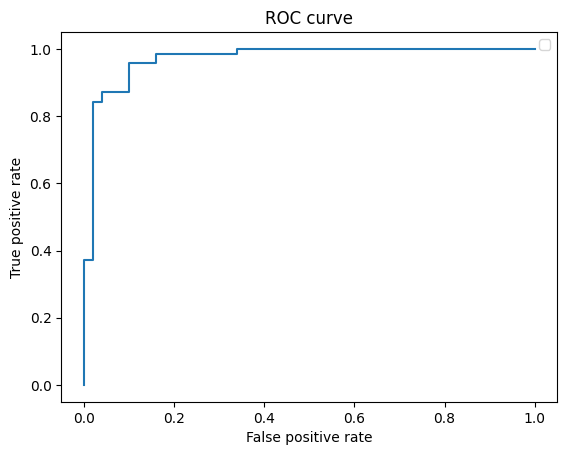

-----------------2nd--ABOD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[219   0]
 [  0 249]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    219.0  249.0       1.0      468.0         468.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.900568917668825

 5 fold cv =  0.9048844657973002
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[46  2]
 [11 59]]
 ACCURACY SCORE:
0.8898
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precisi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.855

 RoC AUC Score::  0.9607142857142859


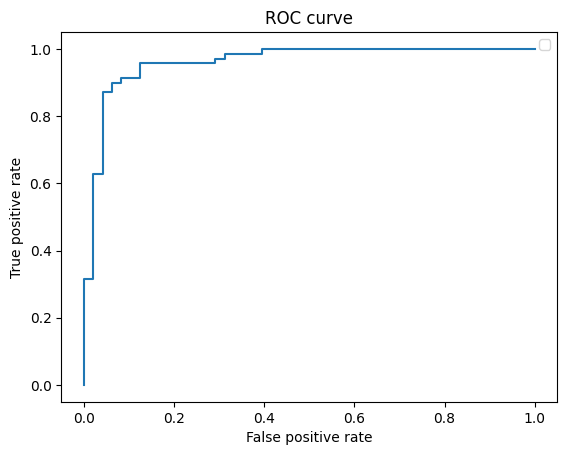

-----------------3rd--ECOD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[199   0]
 [  0 271]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    199.0  271.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8574468085106384

 5 fold cv =  0.8527659574468087
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[41  4]
 [10 63]]
 ACCURACY SCORE:
0.8814
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8086594202898552

 RoC AUC Score::  0.9509893455098934


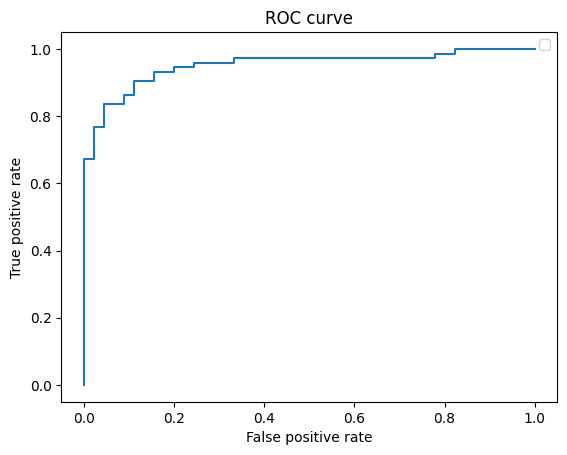

-----------------4th--COPOD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[198   0]
 [  0 272]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    198.0  272.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8702127659574469

 5 fold cv =  0.8665957446808511
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[33  9]
 [ 7 69]]
 ACCURACY SCORE:
0.8644
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
preci

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.7964492753623189

 RoC AUC Score::  0.8994360902255639


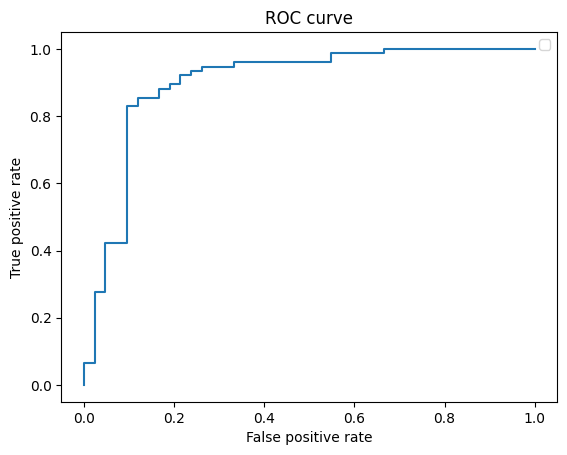

-----------------5th--CBLOF---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[224   0]
 [  0 246]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    224.0  246.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.9202127659574468

 5 fold cv =  0.9187234042553192
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[47  3]
 [12 56]]
 ACCURACY SCORE:
0.8729
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
preci

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8277898550724637

 RoC AUC Score::  0.9400000000000001


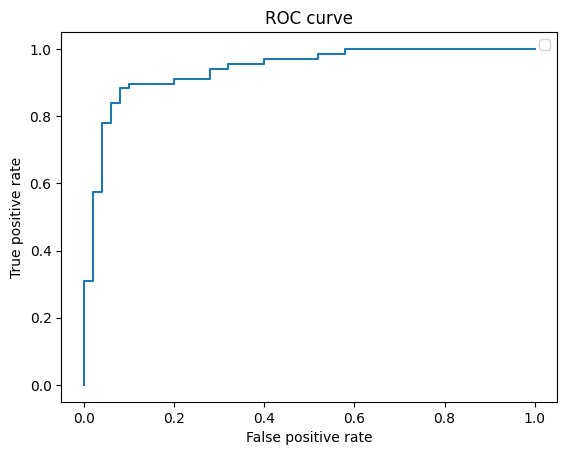

-----------------6th--FB---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[220   0]
 [  0 258]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    220.0  258.0       1.0      478.0         478.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8905939716312058

 5 fold cv =  0.8895723684210526
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[48  0]
 [10 62]]
 ACCURACY SCORE:
0.9167
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precisio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8983333333333333

 RoC AUC Score::  0.9754050925925926


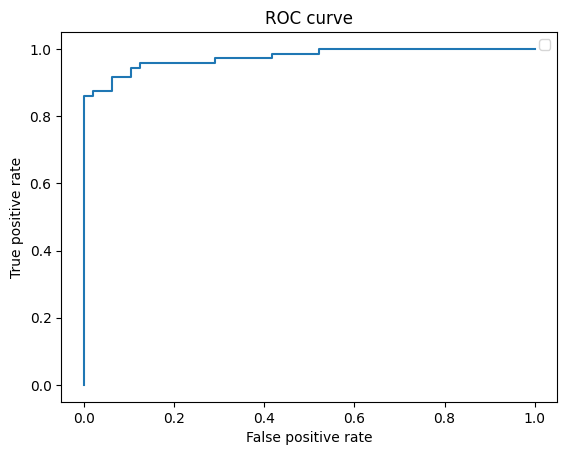

-----------------7th--IFOREST---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[215   0]
 [  0 255]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    215.0  255.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8838297872340428

 5 fold cv =  0.8882978723404257
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[43  3]
 [10 62]]
 ACCURACY SCORE:
0.8898
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
pre

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8584782608695654

 RoC AUC Score::  0.9381038647342995


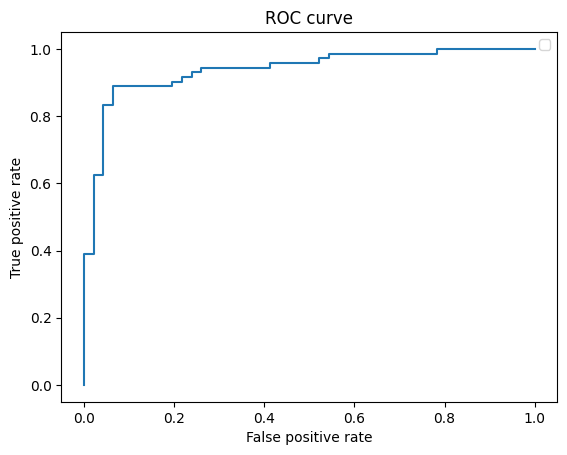

-----------------8th--LOF---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[226   0]
 [  0 249]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    226.0  249.0       1.0      475.0         475.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.9117242907801419

 5 fold cv =  0.9090526315789473
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[49  3]
 [ 9 58]]
 ACCURACY SCORE:
0.8992
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precisi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8531521739130434

 RoC AUC Score::  0.9454649827784155


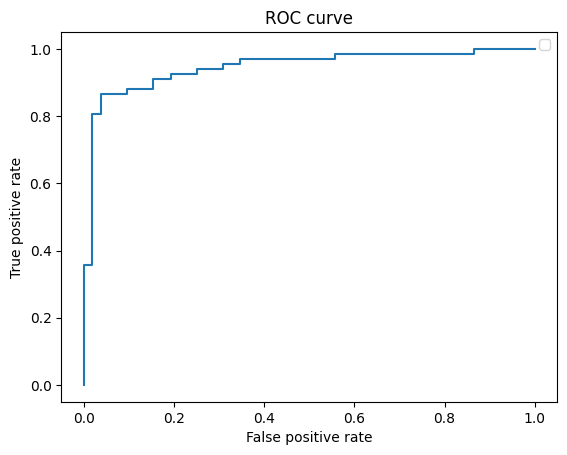

-----------------9th--ROD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[193   0]
 [  0 277]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    193.0  277.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8525531914893617

 5 fold cv =  0.8508510638297874
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[35  6]
 [ 9 68]]
 ACCURACY SCORE:
0.8729
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precisi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8479710144927537

 RoC AUC Score::  0.9410833069369655


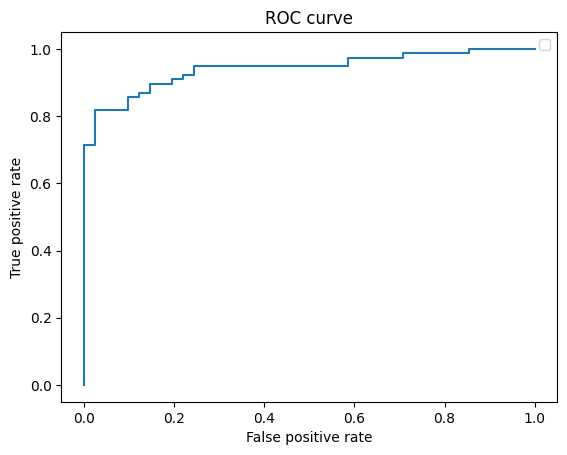

-----------------10th--INNE---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[216   0]
 [  0 254]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    216.0  254.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.9276595744680853

 5 fold cv =  0.925531914893617
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[42  6]
 [13 57]]
 ACCURACY SCORE:
0.8390
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8117391304347826

 RoC AUC Score::  0.8994047619047619


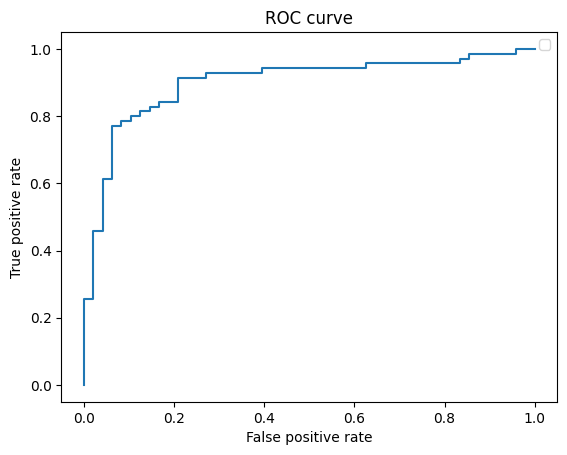

-----------------12th--LODA---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[224   0]
 [  0 246]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    224.0  246.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8485106382978725

 5 fold cv =  0.8500000000000001
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[44  8]
 [ 8 58]]
 ACCURACY SCORE:
0.8644
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
preci

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8210144927536233

 RoC AUC Score::  0.9475524475524476


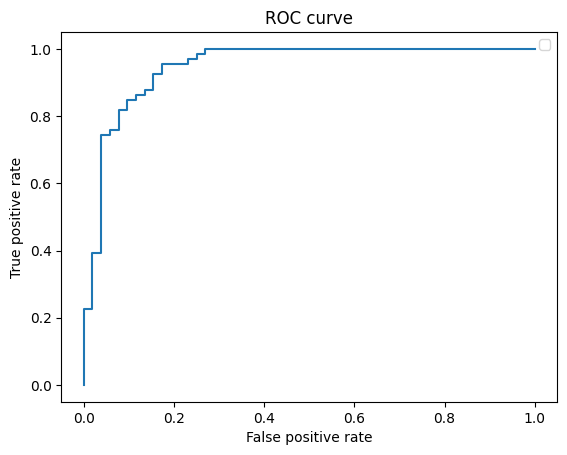

-----------------13th--SUOD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[207   0]
 [  0 265]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    207.0  265.0       1.0      472.0         472.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8947340425531916

 5 fold cv =  0.8885957446808511
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[41  4]
 [ 9 65]]
 ACCURACY SCORE:
0.8908
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
preci

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8235507246376812

 RoC AUC Score::  0.9537537537537537


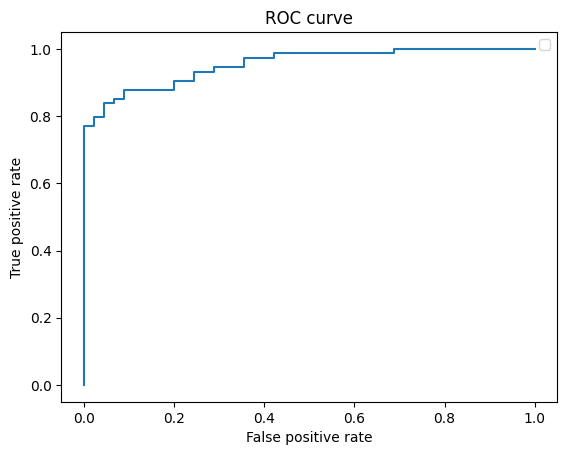

-----------------14th--DeepSVDD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[213   0]
 [  0 257]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    213.0  257.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.893404255319149

 5 fold cv =  0.8963829787234043
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[43  5]
 [13 57]]
 ACCURACY SCORE:
0.8475
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
pr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8053985507246376

 RoC AUC Score::  0.9113095238095238


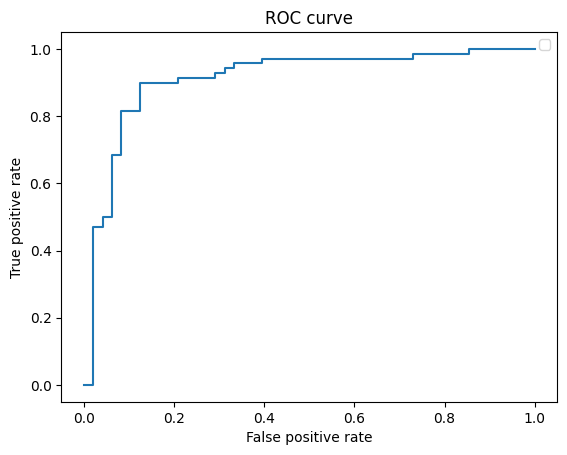

-----------------15th--ALAD---------------

----Model-- LGBMClassifier()

---------------------TRAINING RESULTS----------------------- 

--------------------------------------------------------------------------

 CONFUSION MATRIX:
[[229   0]
 [  0 241]]
 ACCURACY SCORE:
1.0000
 CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    229.0  241.0       1.0      470.0         470.0

 MCC = 1.0

 specificity =  1.0

 Cohen Kappa =  1.0

 F1 Score =  1.0

 Precision =  1.0

 Recall =  1.0

 10 fold cv =  0.8853191489361705

 5 fold cv =  0.8810638297872341
-----------------------TESTING RESULTS-------------------------- 

 CONFUSION MATRIX:
[[48  7]
 [ 9 54]]
 ACCURACY SCORE:
0.8644
 CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
preci

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 5 fold cv =  0.8198188405797101

 RoC AUC Score::  0.9287157287157286


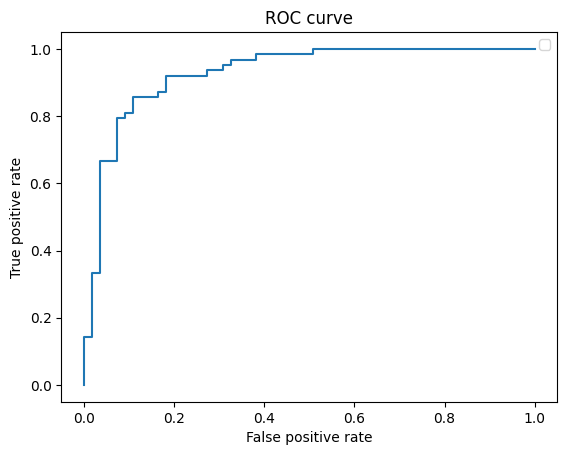

In [48]:
lgbm_clf  = lgbb.LGBMClassifier()
print("-----------------1st--KNN---------------")
lgbm_clf .fit(X_train1, y_train1)
evaluate(lgbm_clf , X_train1, X_test1, y_train1, y_test1)
print("-----------------2nd--ABOD---------------")
lgbm_clf .fit(X_train2, y_train2)
evaluate(lgbm_clf , X_train2, X_test2, y_train2, y_test2)
print("-----------------3rd--ECOD---------------")
lgbm_clf .fit(X_train3, y_train3)
evaluate(lgbm_clf , X_train3, X_test3, y_train3, y_test3)
print("-----------------4th--COPOD---------------")
lgbm_clf .fit(X_train4, y_train4)
evaluate(lgbm_clf , X_train4, X_test4, y_train4, y_test4)
print("-----------------5th--CBLOF---------------")
lgbm_clf .fit(X_train5, y_train5)
evaluate(lgbm_clf , X_train5, X_test5, y_train5, y_test5)
print("-----------------6th--FB---------------")
lgbm_clf .fit(X_train6, y_train6)
evaluate(lgbm_clf , X_train6, X_test6, y_train6, y_test6)
print("-----------------7th--IFOREST---------------")
lgbm_clf .fit(X_train7, y_train7)
evaluate(lgbm_clf , X_train7, X_test7, y_train7, y_test7)
print("-----------------8th--LOF---------------")
lgbm_clf .fit(X_train8, y_train8)
evaluate(lgbm_clf , X_train8, X_test8, y_train8, y_test8)
print("-----------------9th--ROD---------------")
lgbm_clf .fit(X_train9, y_train9)
evaluate(lgbm_clf , X_train9, X_test9, y_train9, y_test9)
print("-----------------10th--INNE---------------")
lgbm_clf .fit(X_train10, y_train10)
evaluate(lgbm_clf , X_train10, X_test10, y_train10, y_test10)
#print("-----------------11th--XGBOD---------------")
#lgbm_clf .fit(X_train11, y_train11)
#evaluate(lgbm_clf , X_train11, X_test11, y_train11, y_test11)
print("-----------------12th--LODA---------------")
lgbm_clf .fit(X_train12, y_train12)
evaluate(lgbm_clf , X_train12, X_test12, y_train12, y_test12)
print("-----------------13th--SUOD---------------")
lgbm_clf .fit(X_train13, y_train13)
evaluate(lgbm_clf , X_train13, X_test13, y_train13, y_test13)
print("-----------------14th--DeepSVDD---------------")
lgbm_clf .fit(X_train14, y_train14)
evaluate(lgbm_clf , X_train14, X_test14, y_train14, y_test14)
print("-----------------15th--ALAD---------------")
lgbm_clf .fit(X_train15, y_train15)
evaluate(lgbm_clf , X_train15, X_test15, y_train15, y_test15)